# Problem Statement

HDB resale prices have been steadily increasing over the decades, especially after the COVID-19 pandemic. This trend has continued for 13 consecutive quarters since 2020. While there are signs of moderation due to government cooling measures, understanding the influencing factors is vital for maximizing ROI, especially for those interested in purchasing Build-To-Order flats with longer waiting times.

**Main Objective**

Our goals as property consultant specialist are to:
* Understand HDB features affecting Resale Price, to give recommendations to potential clients who are looking to buy a resale/BTO flats.
* Choosing the most suitable proposed model to successfully predict HDB Resale Price.

# Import Library and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
# train dataset
df = pd.read_csv('../data/train.csv',low_memory=False)

# Data Cleaning

In [3]:
pd.set_option('display.max_columns', None)
df.head()

id Tranc_YearMonth             town  flat_type block       street_name  \
0   88471         2016-05  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1  122598         2012-07           BISHAN     5 ROOM   153      BISHAN ST 13   
2  170897         2013-07      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   
3   86070         2012-04           BISHAN     4 ROOM   232      BISHAN ST 22   
4  153632         2017-12           YISHUN     4 ROOM   876      YISHUN ST 81   

  storey_range  floor_area_sqm  flat_model  lease_commence_date  resale_price  \
0     10 TO 12            90.0     Model A                 2006      680000.0   
1     07 TO 09           130.0    Improved                 1987      665000.0   
2     13 TO 15           144.0   Apartment                 1997      838000.0   
3     01 TO 05           103.0     Model A                 1992      550000.0   
4     01 TO 03            83.0  Simplified                 1987      298000.0   

   Tranc_Year  Tranc_Month  mid_storey  lower  upper  mid  \
0        2016            5          11     10     12   11   
1        2012            7           8      7      9    8   
2        2013            7          14     13     15   14   
3        2012            4           3      1      5    3   
4        2017           12           2      1      3    2   

        full_flat_type               address  floor_area_sqft  hdb_age  \
0       4 ROOM Model A  3B, UPP BOON KENG RD          968.760       15   
1      5 ROOM Improved     153, BISHAN ST 13         1399.320       34   
2  EXECUTIVE Apartment  289B, BT BATOK ST 25         1550.016       24   
3       4 ROOM Model A     232, BISHAN ST 22         1108.692       29   
4    4 ROOM Simplified     876, YISHUN ST 81          893.412       34   

   max_floor_lvl  year_completed residential commercial market_hawker  \
0             25            2005           Y          N             N   
1              9            1987           Y          N             N   
2             16            1996           Y          N             N   
3             11            1990           Y          Y             N   
4              4            1987           Y          N             N   

  multistorey_carpark precinct_pavilion  total_dwelling_units  1room_sold  \
0                   N                 N                   142           0   
1                   N                 N                   112           0   
2                   N                 N                    90           0   
3                   N                 N                    75           0   
4                   N                 N                    48           0   

   2room_sold  3room_sold  4room_sold  5room_sold  exec_sold  multigen_sold  \
0           0           0          96          46          0              0   
1           0           0          56          56          0              0   
2           0           0           0          30         60              0   
3           0           0          68           7          0              0   
4           0           0          30          18          0              0   

   studio_apartment_sold  1room_rental  2room_rental  3room_rental  \
0                      0             0             0             0   
1                      0             0             0             0   
2                      0             0             0             0   
3                      0             0             0             0   
4                      0             0             0             0   

   other_room_rental  postal  Latitude   Longitude planning_area  \
0                  0  382003  1.314299  103.872828       Kallang   
1                  0  570153  1.346086  103.855078        Bishan   
2                  0  651289  1.343867  103.760535   Bukit Batok   
3                  0  570232  1.358245  103.845504        Bishan   
4                  0  760876  1.414745  103.835532        Yishun   

   Mall_Neares

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

In [5]:
# check for duplicate entries
df.duplicated().value_counts()

False    150634
dtype: int64

In [6]:
# generalize column names
df.columns = df.columns.str.lower()

Postal Code dtype is object, to check any abnormal values.

In [7]:
list(df['postal'].unique())

['382003',
 '570153',
 '651289',
 '570232',
 '760876',
 '380095',
 '530641',
 '470701',
 '570450',
 '544307',
 '544273',
 '520412',
 '550121',
 '161054',
 '670481',
 '670116',
 '730318',
 '570292',
 '570194',
 '760860',
 '730554',
 '791407',
 '730409',
 '530558',
 '370092',
 '731690',
 '641653',
 '650291',
 '310205',
 '610156',
 '680417',
 '753507',
 '321103',
 '542299',
 '312084',
 '330064',
 '683684',
 '560219',
 '310116',
 '730137',
 '650208',
 '101112',
 '750325',
 '730733',
 '520216',
 '350148',
 '680345',
 '760835',
 '612338',
 '521892',
 '644987',
 '400010',
 '560607',
 '560330',
 '510138',
 '211050',
 '650537',
 '751341',
 '120729',
 '760651',
 '120716',
 '821633',
 '560585',
 '600269',
 '460182',
 '543306',
 '730008',
 '310052',
 '570402',
 '731638',
 '601223',
 '370061',
 '160034',
 '560560',
 '731759',
 '791468',
 '542266',
 '670184',
 '560535',
 '310251',
 '310222',
 '541310',
 '410103',
 '570185',
 '822665',
 '650403',
 '510502',
 '600201',
 '200026',
 '530614',
 '650369',

In [8]:
df[df['postal'] == 'NIL'].shape

(33, 77)

there are 33 entries with **'NIL'** value in postal column, to filter out:

In [9]:
df = df[df['postal'] != 'NIL']

In [10]:
# validate
df[df['postal'] == 'NIL']

Empty DataFrame
Columns: [id, tranc_yearmonth, town, flat_type, block, street_name, storey_range, floor_area_sqm, flat_model, lease_commence_date, resale_price, tranc_year, tranc_month, mid_storey, lower, upper, mid, full_flat_type, address, floor_area_sqft, hdb_age, max_floor_lvl, year_completed, residential, commercial, market_hawker, multistorey_carpark, precinct_pavilion, total_dwelling_units, 1room_sold, 2room_sold, 3room_sold, 4room_sold, 5room_sold, exec_sold, multigen_sold, studio_apartment_sold, 1room_rental, 2room_rental, 3room_rental, other_room_rental, postal, latitude, longitude, planning_area, mall_nearest_distance, mall_within_500m, mall_within_1km, mall_within_2km, hawker_nearest_distance, hawker_within_500m, hawker_within_1km, hawker_within_2km, hawker_food_stalls, hawker_market_stalls, mrt_nearest_distance, mrt_name, bus_interchange, mrt_interchange, mrt_latitude, mrt_longitude, bus_stop_nearest_distance, bus_stop_name, bus_stop_latitude, bus_stop_longitude, pri_sch_nearest_distance, pri_sch_name, vacancy, pri_sch_affiliation, pri_sch_latitude, pri_sch_longitude, sec_sch_nearest_dist, sec_sch_name, cutoff_point, affiliation, sec_sch_latitude, sec_sch_longitude]
Index: []

Notice that some of the values in postal column only have 5 digits, this may be due to those starting with 0. To ensure consistency in 6-digit postal code, will add zero in front for those values, but due to dtype limitation, will keep as string.

In [11]:
df.loc[:,'postal'] = df.loc[:,'postal'].str.zfill(6)

## Check for missing value

In [12]:
df.isna().sum().sort_values(ascending = False).head(10)

hawker_within_500m       97357
mall_within_500m         92789
hawker_within_1km        60835
hawker_within_2km        29169
mall_within_1km          25426
mall_within_2km           1940
mall_nearest_distance      829
mrt_name                     0
mrt_nearest_distance         0
hawker_market_stalls         0
dtype: int64

In [13]:
df.loc[df['mall_nearest_distance'].isna() == True,:].iloc[:,22:30]

year_completed residential commercial market_hawker  \
75                2015           Y          N             N   
321               2016           Y          N             N   
478               2015           Y          Y             N   
643               2016           Y          Y             N   
691               2017           Y          N             N   
...                ...         ...        ...           ...   
150296            2016           Y          N             N   
150388            2015           Y          N             N   
150394            2015           Y          Y             N   
150479            2015           Y          N             N   
150625            2015           Y          N             N   

       multistorey_carpark precinct_pavilion  total_dwelling_units  1room_sold  
75                       N                 N                   100           0  
321                      N                 N                   190           0  
478                      N                 N                   120           0  
643                      N                 N                   144           0  
691                      N                 N                   208           0  
...                    ...               ...                   ...         ...  
150296                   N                 N                   160           0  
150388                   N                 N                    62           0  
150394                   N                 N                    94           0  
150479                   N                 N                   124           0  
150625                   N                 N                   116           0  

[829 rows x 8 columns]

In [14]:
df.loc[df['hawker_within_2km'].isna() == True,:].iloc[:,22:30]

year_completed residential commercial market_hawker  \
26                2000           Y          N             N   
27                1996           Y          N             N   
30                1991           Y          N             N   
31                2000           Y          N             N   
33                1999           Y          N             N   
...                ...         ...        ...           ...   
150615            2014           Y          N             N   
150620            2001           Y          N             N   
150623            1999           Y          N             N   
150625            2015           Y          N             N   
150628            2015           Y          N             N   

       multistorey_carpark precinct_pavilion  total_dwelling_units  1room_sold  
26                       N                 N                   152           0  
27                       N                 N                   126           0  
30                       N                 N                    90           0  
31                       N                 N                   113           0  
33                       N                 N                   177           0  
...                    ...               ...                   ...         ...  
150615                   N                 N                    96           0  
150620                   N                 N                    90           0  
150623                   N                 N                    84           0  
150625                   N                 N                   116           0  
150628                   N                 N                   150           0  

[29169 rows x 8 columns]

**Observation** : Mall and Hawker each have features identifying: 1) nearest distance 2) unit count within distance range. Based on this set of features, we can deduce:
* `Mall_Nearest_Distance` value is missing because there is no mall within 2km
* `Hawker_Nearest_Distance` does not have missing value because it has data available beyond 2km
* Missing value for unit count within distance range is due to the nearest distance is out of bound

> Hence, we can safely replace the missing values with '0', and it will still be valid.

In [15]:
df.fillna(0, inplace = True)

In [16]:
# validate again
df.isna().sum().sort_values(ascending = False).head()

id                         0
hawker_nearest_distance    0
mrt_name                   0
mrt_nearest_distance       0
hawker_market_stalls       0
dtype: int64

# Data Exploration

Based on first-pass interpretation on feature descriptions, decided to drop some columns that may not be interpretable in modelling. (justication included in the table)

<details>
    <summary> Data Dictionary </summary>

#|Features|Description|Dtype|Drop|Justification
---|---|---|---|---|---
0|id| NA|int64|
1|tranc_yearmonth| year and month of the resale transaction, e.g. 2015-02|object
2|town| HDB township where the flat is located, e.g. BUKIT MERAH|object
3|flat_type| type of the resale flat unit, e.g. 3 ROOM|object
4|block| block number of the resale flat, e.g. 454|object|Y|block number is random, may not be useful in model interpretation
5|street_name| street name where the resale flat resides, e.g. TAMPINES ST 42|object|Y|street name is too specific, may not be useful in model interpretation
6|storey_range| floor level (range) of the resale flat unit, e.g. 07 TO 09|object
7|floor_area_sqm| floor area of the resale flat unit in square metres|float64
8|flat_model| HDB model of the resale flat, e.g. Multi Generation|object
9|lease_commence_date| commencement year of the flat unit's 99-year lease|int64
10|resale_price| the property's sale price in Singapore dollars. <span style="color:maroon">**This is the target variable**</span>|float64
11|tranc_year| year of resale transaction|int64
12|tranc_month| month of resale transaction|int64
13|mid_storey| median value of storey_range|int64|Y|similar feature as feature #6
14|lower| lower value of storey_range|int64|Y|similar feature as feature #6
15|upper| upper value of storey_range|int64|Y|similar feature as feature #6
16|mid| middle value of storey_range|int64|Y|similar feature as feature #6
17|full_flat_type| combination of flat_type and flat_model|object
18|address| combination of block and street_name|object|Y|address is too specific, may not be useful in model interpretation
19|floor_area_sqft| floor area of the resale flat unit in square feet|float64
20|hdb_age| number of years from lease_commence_date to present year|int64
21|max_floor_lvl| highest floor of the resale flat|int64
22|year_completed| year which construction was completed for resale flat|int64
23|residential| boolean value if resale flat has residential units in the same block|object
24|commercial| boolean value if resale flat has commercial units in the same block|object
25|market_hawker| boolean value if resale flat has a market or hawker centre in the same block|object
26|multistorey_carpark| boolean value if resale flat has a multistorey carpark in the same block|object
27|precinct_pavilion| boolean value if resale flat has a pavilion in the same block|object
28|total_dwelling_units| total number of residential dwelling units in the resale flat|int64
29|1room_sold| number of 1-room residential units in the resale flat|int64
30|2room_sold| number of 2-room residential units in the resale flat|int64
31|3room_sold| number of 3-room residential units in the resale flat|int64
32|4room_sold| number of 4-room residential units in the resale flat|int64
33|5room_sold| number of 5-room residential units in the resale flat|int64
34|exec_sold| number of executive type residential units in the resale flat block|int64
35|multigen_sold| number of multi-generational type residential units in the resale flat block|int64
36|studio_apartment_sold| number of studio apartment type residential units in the resale flat block|int64
37|1room_rental| number of 1-room rental residential units in the resale flat block|int64
38|2room_rental| number of 2-room rental residential units in the resale flat block|int64
39|3room_rental| number of 3-room rental residential units in the resale flat block|int64
40|other_room_rental| number of "other" type rental residential units in the resale flat block|int64
41|postal| postal code of the resale flat block|object
42|latitude| Latitude based on postal code|float64
43|longitude| Longitude based on postal code|float64
44|planning_area| Government planning area that the flat is located|object
45|mall_nearest_distance| distance (in metres) to the nearest mall|float64
46|mall_within_500m| number of malls within 500 metres|float64
47|mall_within_1km| number of malls within 1 kilometre|float64
48|mall_within_2km| number of malls within 2 kilometres|float64
49|hawker_nearest_distance| distance (in metres) to the nearest hawker centre|float64
50|hawker_within_500m| number of hawker centres within 500 metres|float64
51|hawker_within_1km| number of hawker centres within 1 kilometre|float64
52|hawker_within_2km| number of hawker centres within 2 kilometres|float64
53|hawker_food_stalls| number of hawker food stalls in the nearest hawker centre|int64
54|hawker_market_stalls| number of hawker and market stalls in the nearest hawker centre|int64
55|mrt_nearest_distance| distance (in metres) to the nearest MRT station|float64
56|mrt_name| name of the nearest MRT station|object
57|bus_interchange| boolean value if the nearest MRT station is also a bus interchange|int64
58|mrt_interchange| boolean value if the nearest MRT station is a train interchange station|int64
59|mrt_latitude| latitude (in decimal degrees) of the the nearest MRT station|float64
60|mrt_longitude| longitude (in decimal degrees) of the nearest MRT station|float64
61|bus_stop_nearest_distance| distance (in metres) to the nearest bus stop|float64
62|bus_stop_name| name of the nearest bus stop|object|Y|bus stop name is too specific, may not be useful in model interpretation
63|bus_stop_latitude| latitude (in decimal degrees) of the the nearest bus stop|float64
64|bus_stop_longitude| longitude (in decimal degrees) of the nearest bus stop|float64
65|pri_sch_nearest_distance| distance (in metres) to the nearest primary school|float64
66|pri_sch_name| name of the nearest primary school|object
67|vacancy| number of vacancies in the nearest primary school|int64
68|pri_sch_affiliation| boolean value if the nearest primary school has a secondary school affiliation|int64
69|pri_sch_latitude| latitude (in decimal degrees) of the the nearest primary school|float64
70|pri_sch_longitude| longitude (in decimal degrees) of the nearest primary school|float64
71|sec_sch_nearest_dist| distance (in metres) to the nearest secondary school|float64
72|sec_sch_name| name of the nearest secondary school|object
73|cutoff_point| PSLE cutoff point of the nearest secondary school|int64
74|affiliation| boolean value if the nearest secondary school has an primary school affiliation|int64
75|sec_sch_latitude| latitude (in decimal degrees) of the the nearest secondary school|float64
76|sec_sch_longitude| longitude (in decimal degrees) of the nearest secondary school|float64

</details>


In [17]:
df = df.drop(columns = ['id','block','street_name','mid_storey','lower','upper','mid','address','bus_stop_name'])
df.shape

(150601, 68)

* In section below, features are separeted into 3 different sections: binary, categorical, numerical.
* After that, we will assess features within each section based on:
    1. Relationship with Resale Price (target)
    2. Distribution

In [18]:
# separate out target col
target = ['resale_price']

## Binary

In [19]:
# binary list
binary = ['residential','commercial','market_hawker','multistorey_carpark','precinct_pavilion','bus_interchange','mrt_interchange','pri_sch_affiliation','affiliation']

In [20]:
df[binary].head()

residential commercial market_hawker multistorey_carpark precinct_pavilion  \
0           Y          N             N                   N                 N   
1           Y          N             N                   N                 N   
2           Y          N             N                   N                 N   
3           Y          Y             N                   N                 N   
4           Y          N             N                   N                 N   

   bus_interchange  mrt_interchange  pri_sch_affiliation  affiliation  
0                0                0                    1            0  
1                1                1                    1            0  
2                1                0                    0            0  
3                1                1                    1            1  
4                0                0                    0            0

Convert binary Y/N to 0/1

In [21]:
for feature in df[binary]:
    if df[feature].dtype == 'O':
        df[feature] = (df [feature] == 'Y').astype(int) 

In [22]:
# validate
df[binary].head()

residential  commercial  market_hawker  multistorey_carpark  \
0            1           0              0                    0   
1            1           0              0                    0   
2            1           0              0                    0   
3            1           1              0                    0   
4            1           0              0                    0   

   precinct_pavilion  bus_interchange  mrt_interchange  pri_sch_affiliation  \
0                  0                0                0                    1   
1                  0                1                1                    1   
2                  0                1                0                    0   
3                  0                1                1                    1   
4                  0                0                0                    0   

   affiliation  
0            0  
1            0  
2            0  
3            1  
4            0

In [23]:
df['multistorey_carpark'].value_counts()

0    150559
1        42
Name: multistorey_carpark, dtype: int64

Relationship with Resale Price

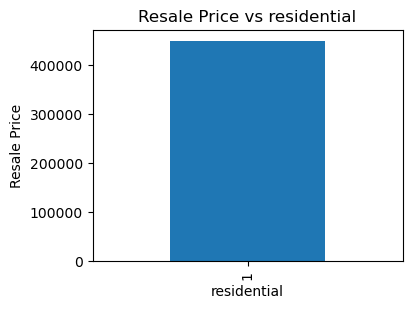

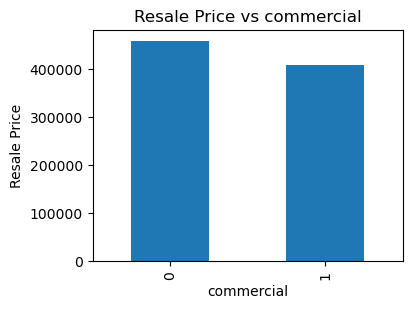

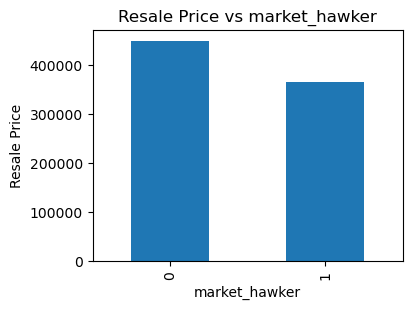

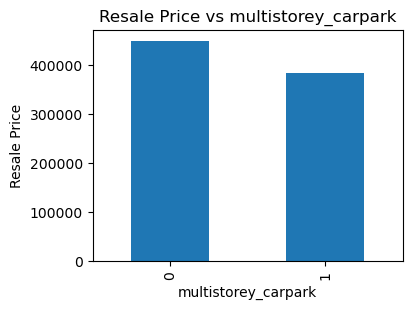

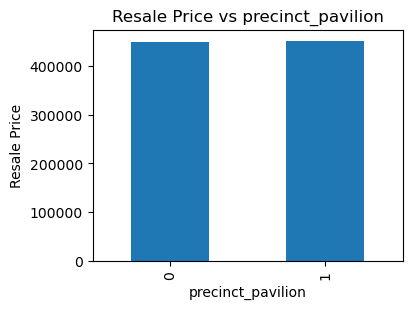

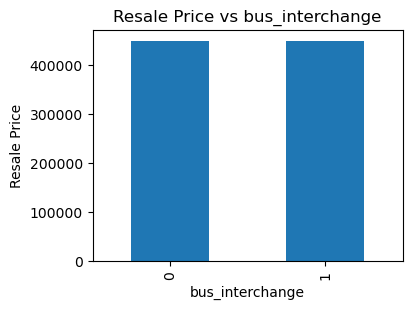

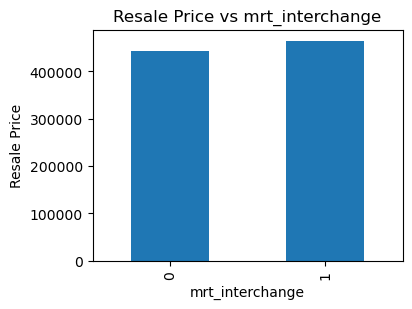

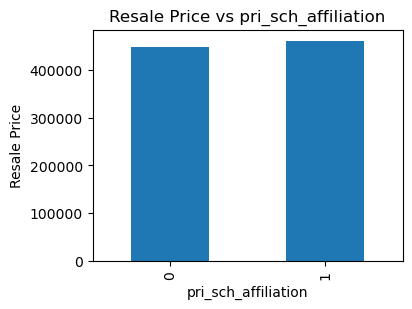

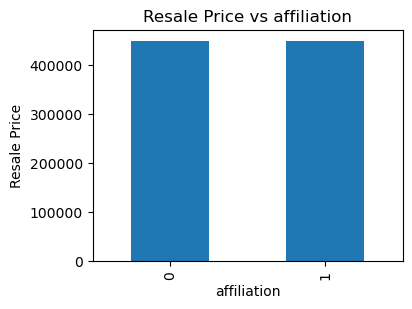

In [24]:
for feature in binary:
    plt.figure(figsize=(4, 3))
    df.groupby(feature)['resale_price'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Resale Price')
    plt.title(f'Resale Price vs {feature}')

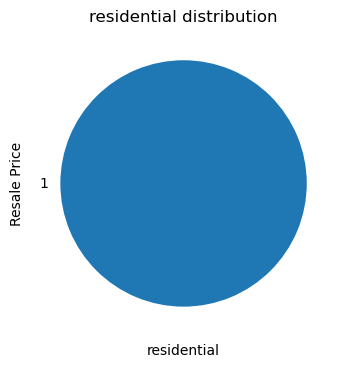

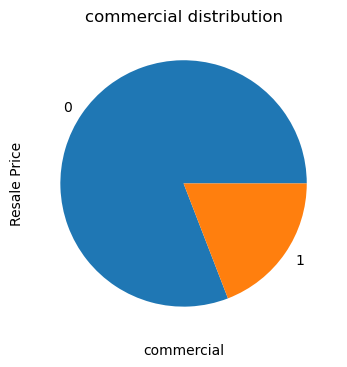

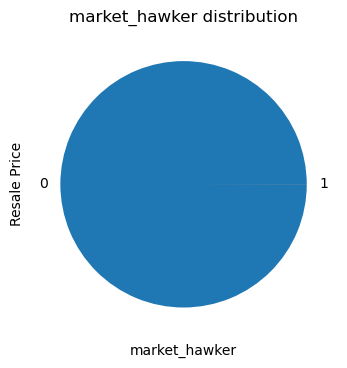

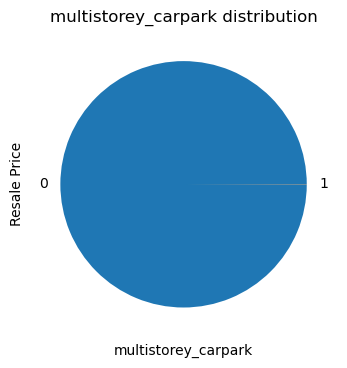

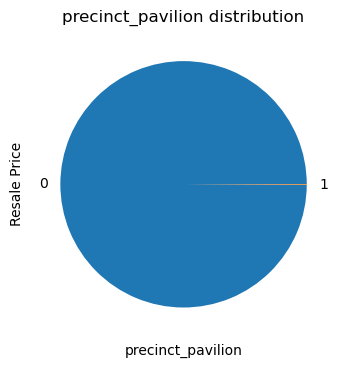

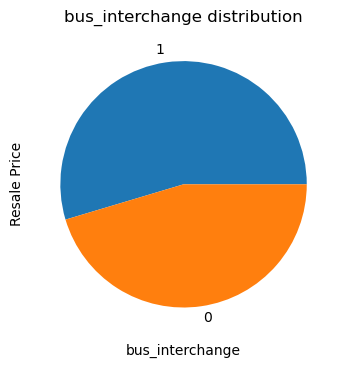

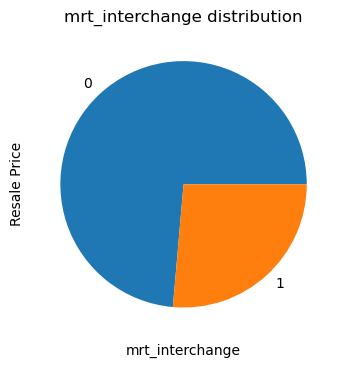

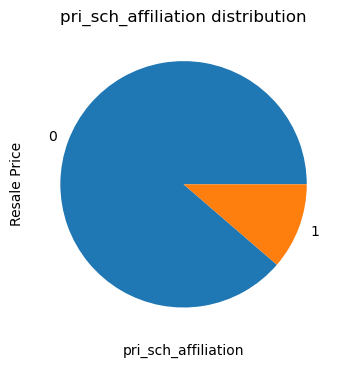

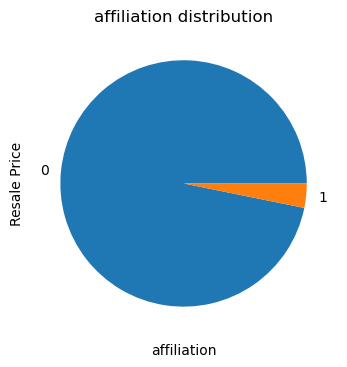

In [25]:
for feature in binary:
    plt.figure(figsize=(4, 4))
    df[feature].value_counts().plot.pie()
    plt.xlabel(feature)
    plt.ylabel('Resale Price')
    plt.title(f'{feature} distribution')
    plt.show()

**Observation**: 
* `residential` feature only has 1 unique value, to drop.
* Despite having relationshiop with resale price (based on mean value), `market_hawker`, `multistorey_carpark`, `precinct_pavilion` have very limited **'1'** value, this may skew the conclusion, to drop.
* Although there is no significant relationship with resale price, the rest of the features have sufficiently distributed values, will keep these features.

In [26]:
unwanted_binary = ['residential','market_hawker','multistorey_carpark','precinct_pavilion']

In [27]:
# drop from main df
df = df.drop (columns = unwanted_binary)

In [28]:
# update binary list
binary = [feature for feature in binary if feature not in unwanted_binary]
binary

['commercial',
 'bus_interchange',
 'mrt_interchange',
 'pri_sch_affiliation',
 'affiliation']

In [29]:
# set temporary df excluding binary features 
# to facilitate separation of numerical and categorical features in next sections
nonbin_df = df.drop (columns = binary).drop (columns = target)

In [30]:
# separate out numerical and catergorical columns
numerical = []
categorical = []

for col in nonbin_df.columns:
    if (nonbin_df[col].dtypes == 'int64') or (nonbin_df[col].dtypes == 'float64') or (nonbin_df[col].dtypes == 'datetime64[ns]'):
        numerical.append(col)
    elif nonbin_df[col].dtypes == 'object':
        categorical.append(col)

## Numerical

In [31]:
df[numerical].head()

floor_area_sqm  lease_commence_date  tranc_year  tranc_month  \
0            90.0                 2006        2016            5   
1           130.0                 1987        2012            7   
2           144.0                 1997        2013            7   
3           103.0                 1992        2012            4   
4            83.0                 1987        2017           12   

   floor_area_sqft  hdb_age  max_floor_lvl  year_completed  \
0          968.760       15             25            2005   
1         1399.320       34              9            1987   
2         1550.016       24             16            1996   
3         1108.692       29             11            1990   
4          893.412       34              4            1987   

   total_dwelling_units  1room_sold  2room_sold  3room_sold  4room_sold  \
0                   142           0           0           0          96   
1                   112           0           0           0          56   
2                    90           0           0           0           0   
3                    75           0           0           0          68   
4                    48           0           0           0          30   

   5room_sold  exec_sold  multigen_sold  studio_apartment_sold  1room_rental  \
0          46          0              0                      0             0   
1          56          0              0                      0             0   
2          30         60              0                      0             0   
3           7          0              0                      0             0   
4          18          0              0                      0             0   

   2room_rental  3room_rental  other_room_rental  latitude   longitude  \
0             0             0                  0  1.314299  103.872828   
1             0             0                  0  1.346086  103.855078   
2             0             0                  0  1.343867  103.760535   
3             0             0                  0  1.358245  103.845504   
4             0             0                  0  1.414745  103.835532   

   mall_nearest_distance  mall_within_500m  mall_within_1km  mall_within_2km  \
0            1094.090418               0.0              0.0              7.0   
1             866.941448               0.0              1.0              3.0   
2            1459.579948               0.0              0.0              4.0   
3             950.175199               0.0              1.0              4.0   
4             729.771895               0.0              1.0              2.0   

   hawker_nearest_distance  hawker_within_500m  hawker_within_1km  \
0               154.753357                 1.0                3.0   
1               640.151925                 0.0                1.0   
2              1762.082341                 0.0                0.0   
3               726.215262                 0.0                1.0   
4              1540.151439                 0.0                0.0   

   hawker_within_2km  hawker_food_stalls  hawker_market_stalls  \
0               13.0                  84                    60   
1                7.0                  80                    77   
2                1.0                  84                    95   
3                9.0                  32                    86   
4                1.0                  45                     0   

   mrt_nearest_distance  mrt_latitude  mrt_longitude  \
0            330.083069      1.311540     103.871731   
1            903.659703      1.350580     103.848305   
2           1334.251197      1.349561     103.749970   
3            907.453484      1.350580     103.848305   
4            412.343032      1.417131     103.832692   

   bus_stop_nearest_distance  bus_stop_latitude  bus_stop_longitude  \
0                  29.427395           1.314433          103.872600   
1                  58.207761           1.345659          103.855381   
2      

In [32]:
df[numerical].columns

Index(['floor_area_sqm', 'lease_commence_date', 'tranc_year', 'tranc_month',
       'floor_area_sqft', 'hdb_age', 'max_floor_lvl', 'year_completed',
       'total_dwelling_units', '1room_sold', '2room_sold', '3room_sold',
       '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'latitude', 'longitude', 'mall_nearest_distance',
       'mall_within_500m', 'mall_within_1km', 'mall_within_2km',
       'hawker_nearest_distance', 'hawker_within_500m', 'hawker_within_1km',
       'hawker_within_2km', 'hawker_food_stalls', 'hawker_market_stalls',
       'mrt_nearest_distance', 'mrt_latitude', 'mrt_longitude',
       'bus_stop_nearest_distance', 'bus_stop_latitude', 'bus_stop_longitude',
       'pri_sch_nearest_distance', 'vacancy', 'pri_sch_latitude',
       'pri_sch_longitude', 'sec_sch_nearest_dist', 'cutoff_point',
       'sec_sch_latitude', 'sec_sch_longitude'],
      dtype='

C:\Users\darwi\AppData\Local\Temp\ipykernel_25424\257148333.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(4, 3))


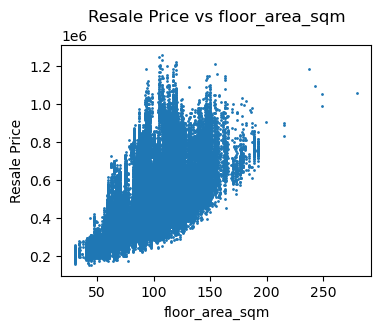

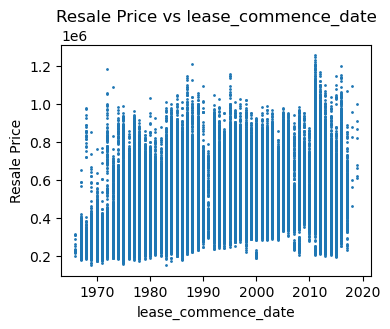

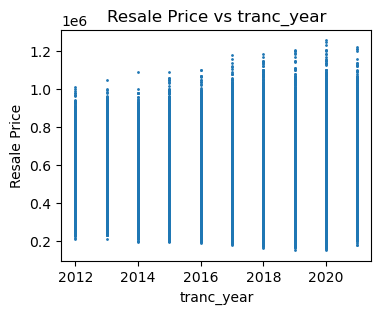

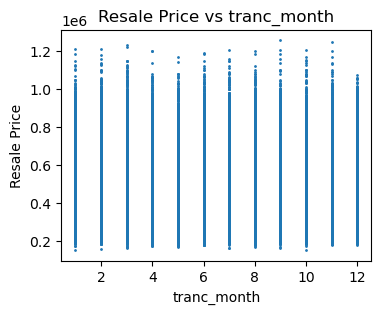

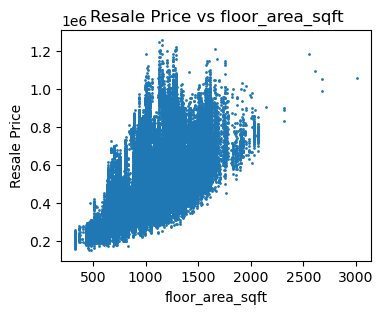

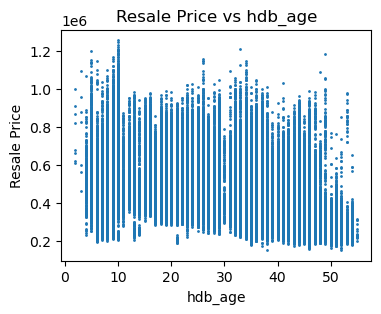

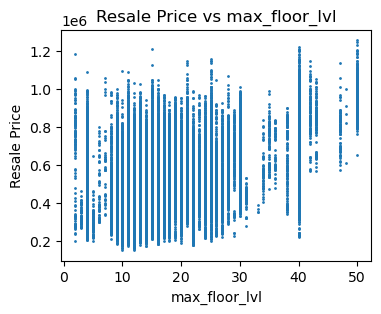

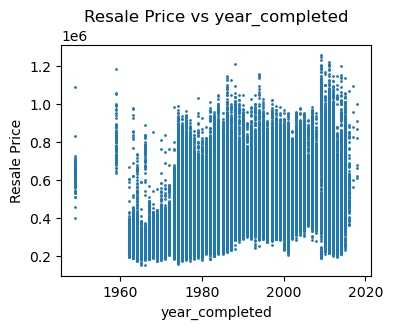

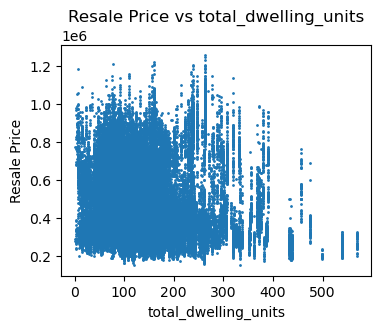

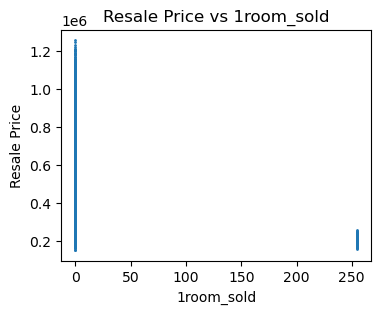

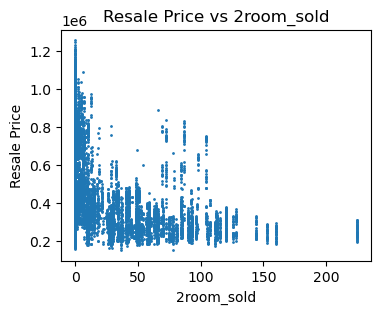

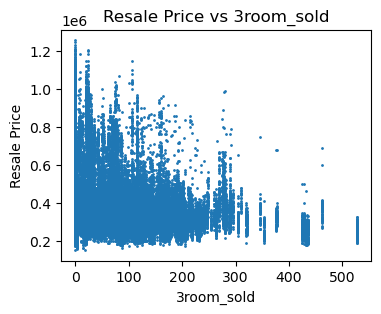

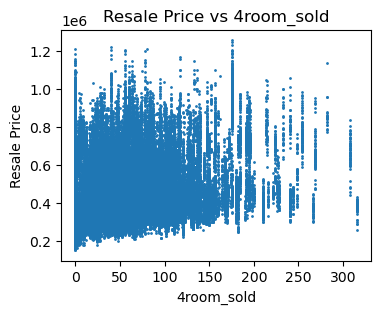

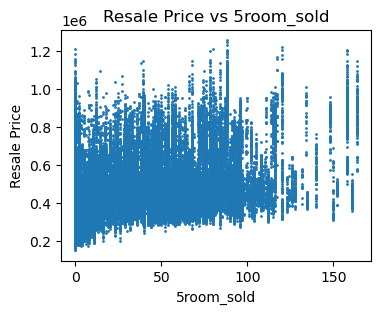

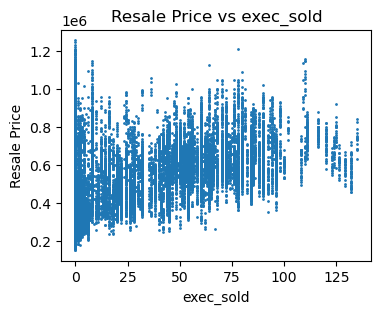

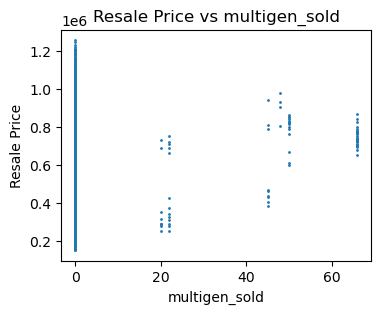

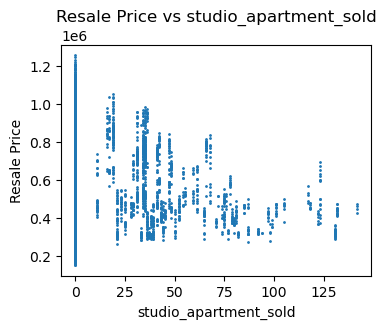

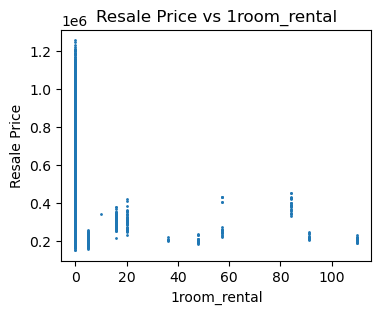

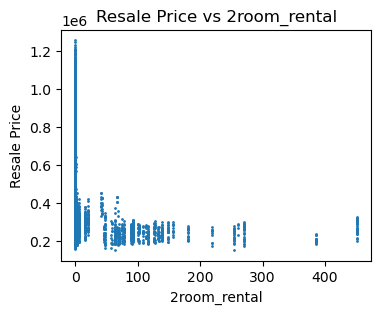

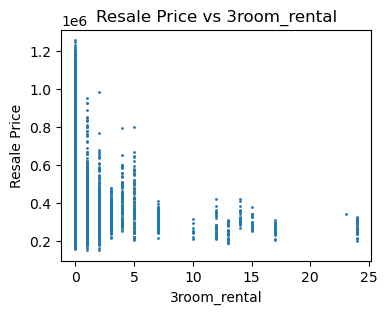

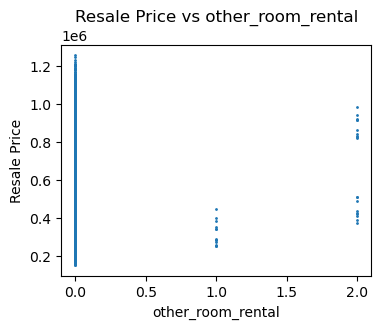

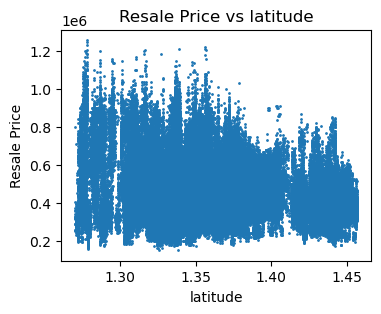

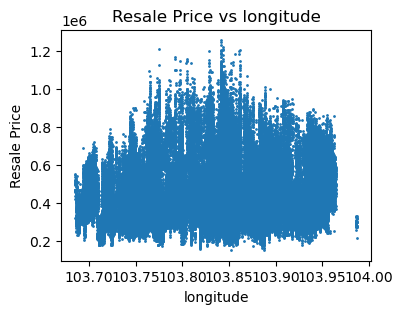

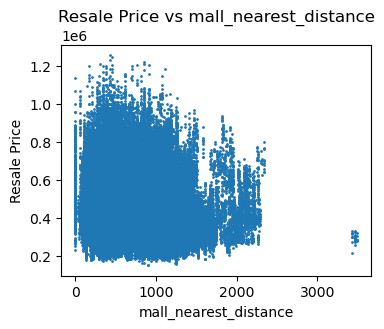

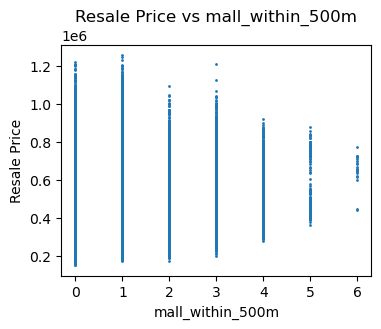

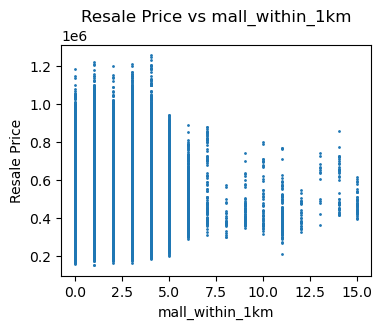

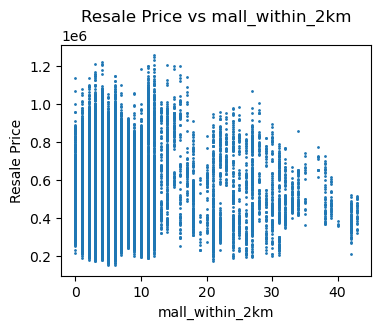

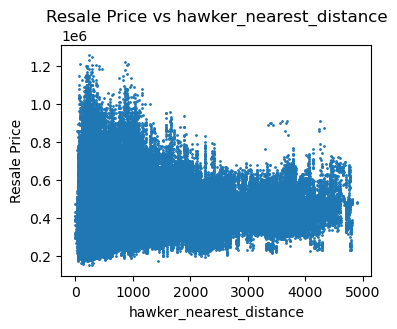

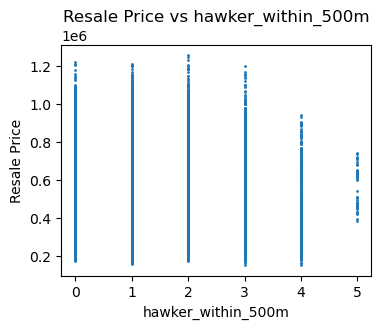

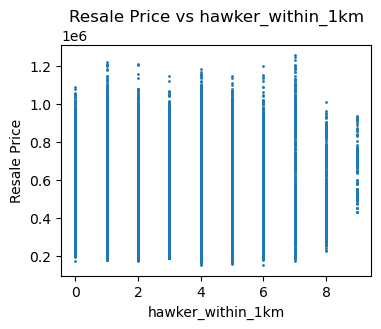

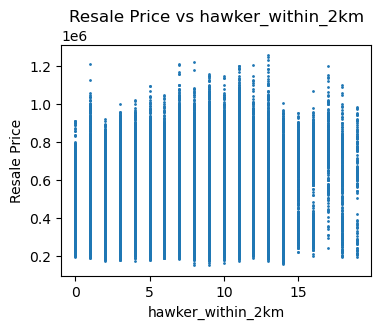

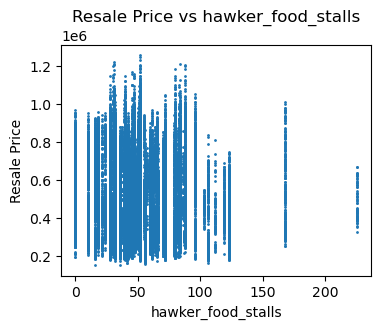

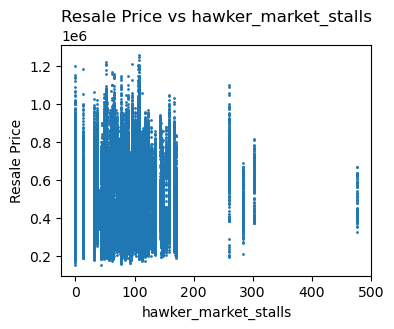

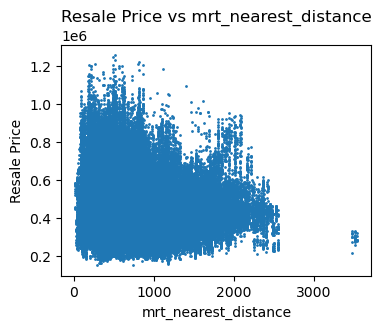

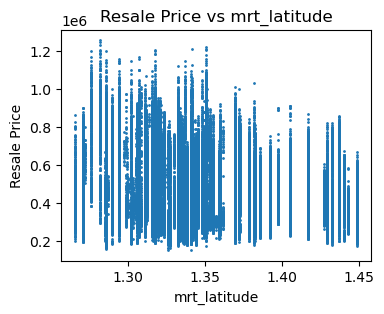

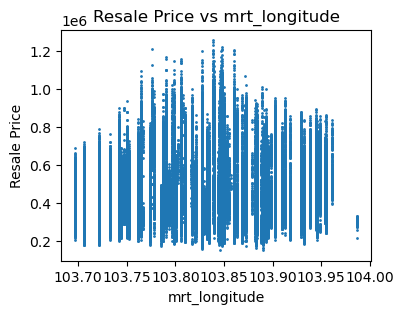

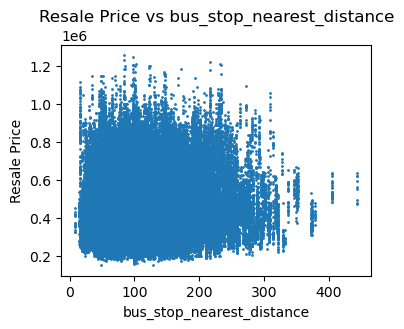

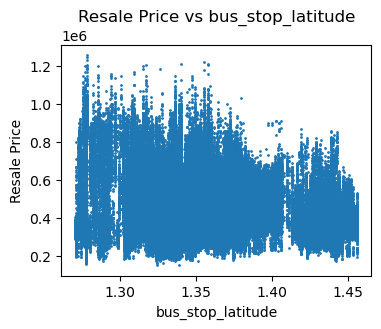

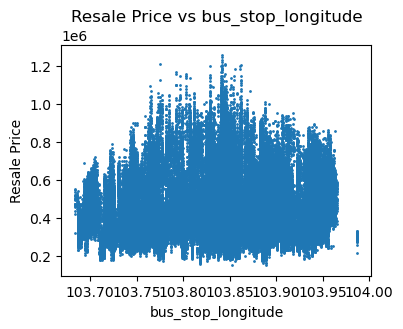

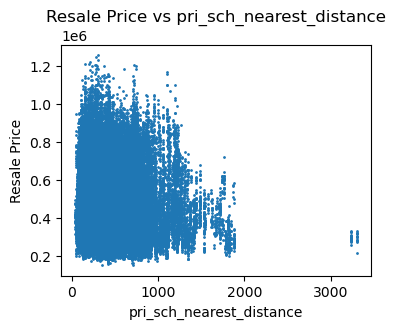

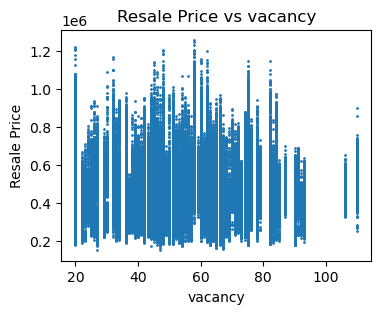

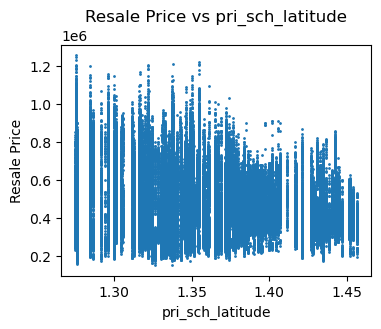

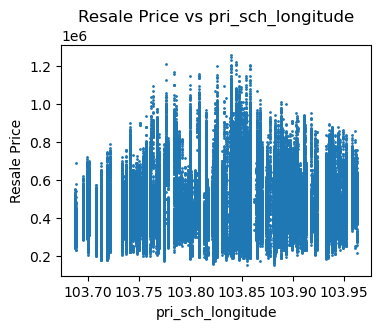

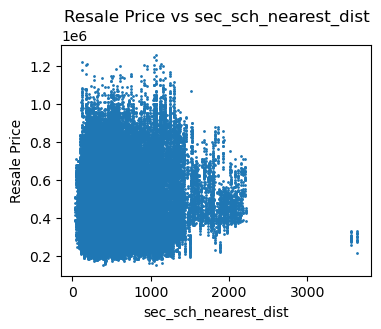

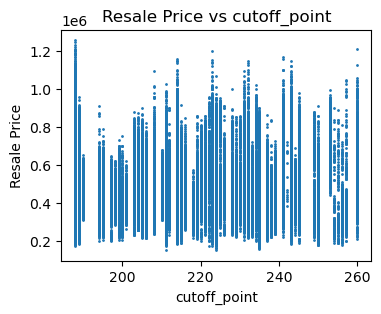

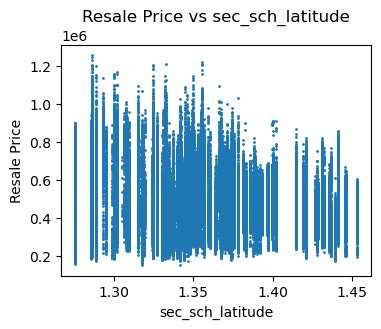

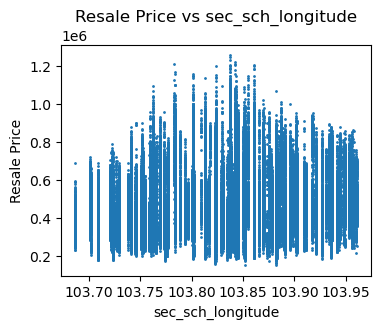

In [33]:
for feature in numerical:
    plt.figure(figsize=(4, 3))
    plt.scatter(x = df[feature], y = df['resale_price'],s = 1)
    plt.xlabel(feature)
    plt.ylabel('Resale Price')
    plt.title(f'Resale Price vs {feature}')

**Observation**:  
Apart from `floor_area_sqm` and `floor_area_sqft`, observe no significant relationship from other features. To drop **sqft** version as it is redundant.

In [34]:
# drop from main df
df = df.drop (columns = 'floor_area_sqft')

# remove from numerical list
numerical.remove('floor_area_sqft')

### Periodic

Observe there are 4 periodic variables: `lease_commence_date`, `tranc_year`, `tranc_month`, `year_completed`, `hdb_age`. create a new feature `remaining_year` to calculate the remaining year (out of 99 years) at the point of sale.

In [35]:
df['remaining_year'] = 99 - (df['tranc_year'] - df['lease_commence_date'])
numerical.append('remaining_year')

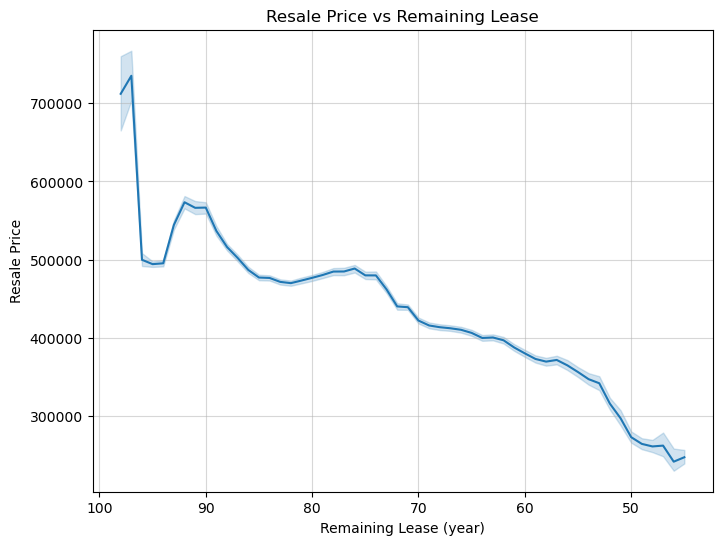

In [36]:
# Relationship between remaining lease vs resale price
plt.figure(figsize = (8,6))
sns.lineplot(x = "remaining_year", y = "resale_price", data = df)
plt.xlabel('Remaining Lease (year)')
plt.ylabel('Resale Price')
plt.title('Resale Price vs Remaining Lease')
plt.grid(alpha = 0.5)
plt.gca().invert_xaxis()
plt.savefig('../image/resale_price_remaining_lease.png')

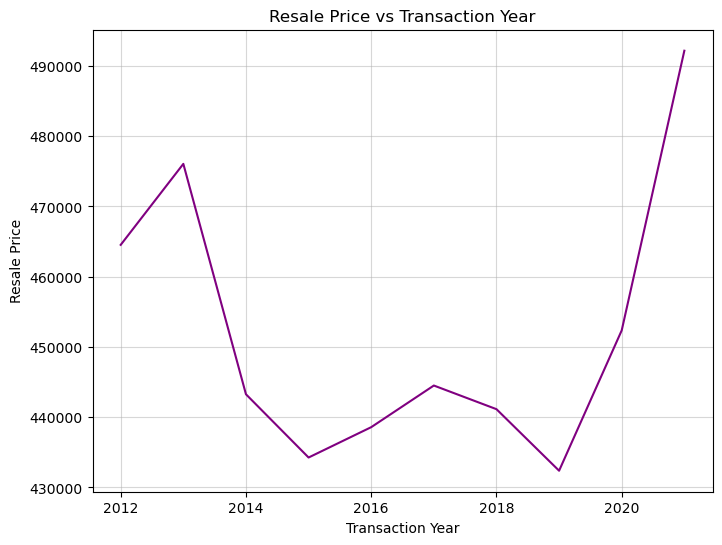

In [37]:
# Relationship between Resale Price vs Transaction Year
plt.figure(figsize = (8,6))
sns.lineplot(x = "tranc_year", y = "resale_price", data = df, errorbar=None, c = 'purple')
plt.xlabel('Transaction Year')
plt.ylabel('Resale Price')
plt.title('Resale Price vs Transaction Year')
plt.grid(alpha = 0.5)
plt.savefig('../image/resale_price_transaction_year.png')

**Observation**: HDB price slumped in 2014 due to [government cooling measures](https://stackedhomes.com/editorial/singapore-cooling-measures-history/) and has been stagnant for half a decade, before [climbing 5% in 2020 during pandemic](https://www.straitstimes.com/business/property/sales-of-hdb-resale-flats-hit-8-year-high-in-2020-as-prices-climb-5 ).

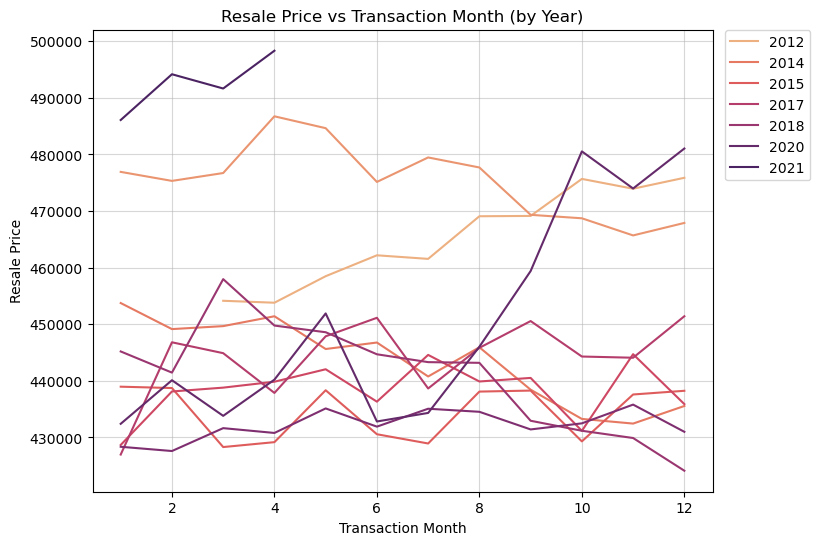

In [38]:
# Relationship between Resale Price vs Transaction Month (by Year)
plt.figure(figsize = (8,6))
sns.lineplot(x = "tranc_month", y = "resale_price", hue = 'tranc_year', data = df, errorbar=None, palette = 'flare')
plt.xlabel('Transaction Month')
plt.ylabel('Resale Price')
plt.title('Resale Price vs Transaction Month (by Year)')
plt.grid(alpha = 0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
plt.savefig('../image/resale_price_transaction_month.png')

**Observation**: There is no clear annual trending of resale price. The increase/decrease in price is likely due to price fluctuation over the year.

## Categorical

In [39]:
df[categorical].head()

tranc_yearmonth             town  flat_type storey_range  flat_model  \
0         2016-05  KALLANG/WHAMPOA     4 ROOM     10 TO 12     Model A   
1         2012-07           BISHAN     5 ROOM     07 TO 09    Improved   
2         2013-07      BUKIT BATOK  EXECUTIVE     13 TO 15   Apartment   
3         2012-04           BISHAN     4 ROOM     01 TO 05     Model A   
4         2017-12           YISHUN     4 ROOM     01 TO 03  Simplified   

        full_flat_type  postal planning_area     mrt_name  \
0       4 ROOM Model A  382003       Kallang      Kallang   
1      5 ROOM Improved  570153        Bishan       Bishan   
2  EXECUTIVE Apartment  651289   Bukit Batok  Bukit Batok   
3       4 ROOM Model A  570232        Bishan       Bishan   
4    4 ROOM Simplified  760876        Yishun       Khatib   

                            pri_sch_name  \
0               Geylang Methodist School   
1  Kuo Chuan Presbyterian Primary School   
2                  Keming Primary School   
3                   Catholic High School   
4              Naval Base Primary School   

                              sec_sch_name  
0                 Geylang Methodist School  
1  Kuo Chuan Presbyterian Secondary School  
2             Yusof Ishak Secondary School  
3                     Catholic High School  
4             Orchid Park Secondary School

`tranc_yearmonth` is redundant as it is already analyzed in the previous section, to drop.

In [40]:
# drop from main df
df = df.drop (columns = 'tranc_yearmonth')

# remove from categorical list
categorical.remove('tranc_yearmonth')

Convert postal code to regions in Singapore based on first 2 digit. This will give better representation of regions, instead of actual postal that is too specific.

<img src="https://singaporemap360.com/img/1200/singapore-postcodes-map.jpg.webp"  width="60%" >

*Source: [SingaporeMap360](https://singaporemap360.com/singapore-postcode-map).*

In [41]:
df['postal'] = df['postal'].str[:2] 

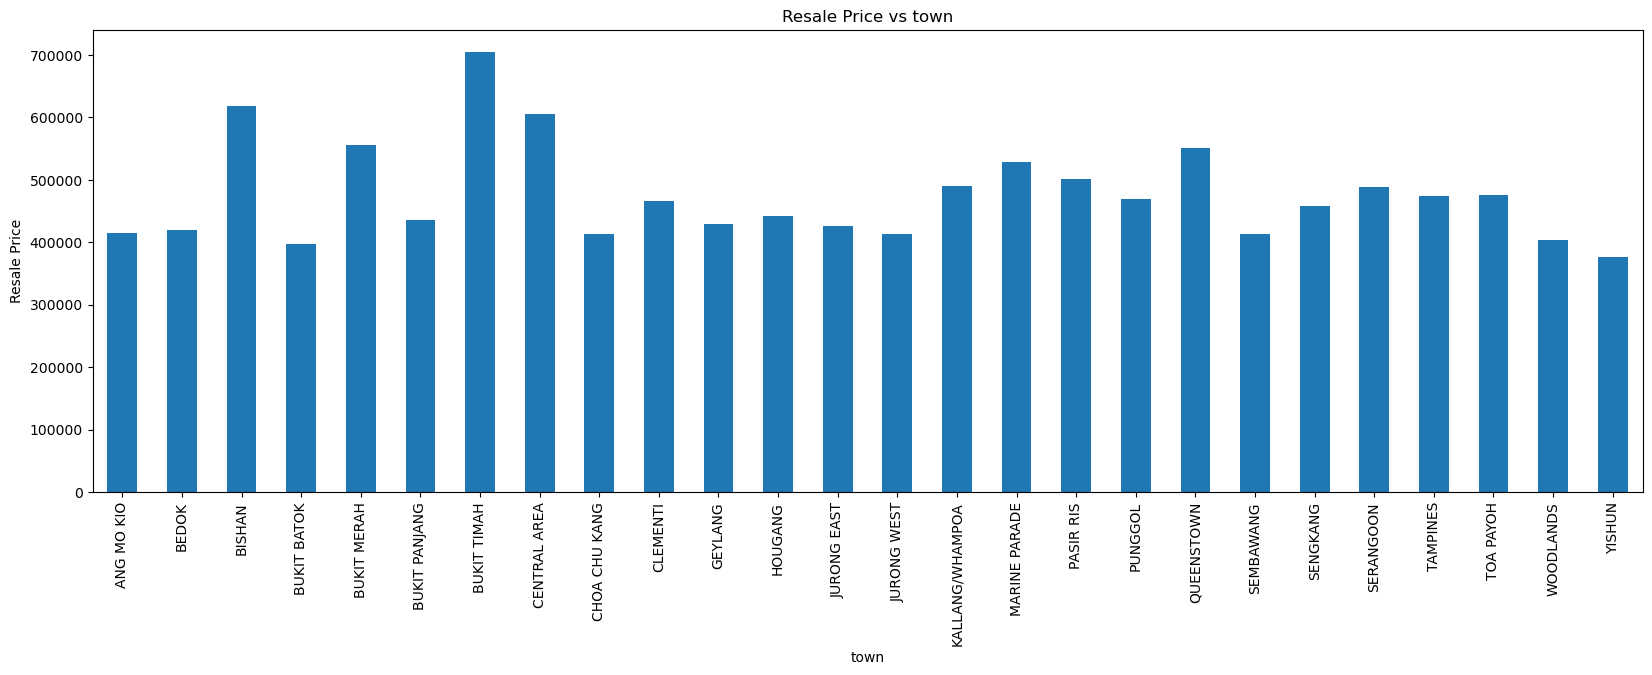

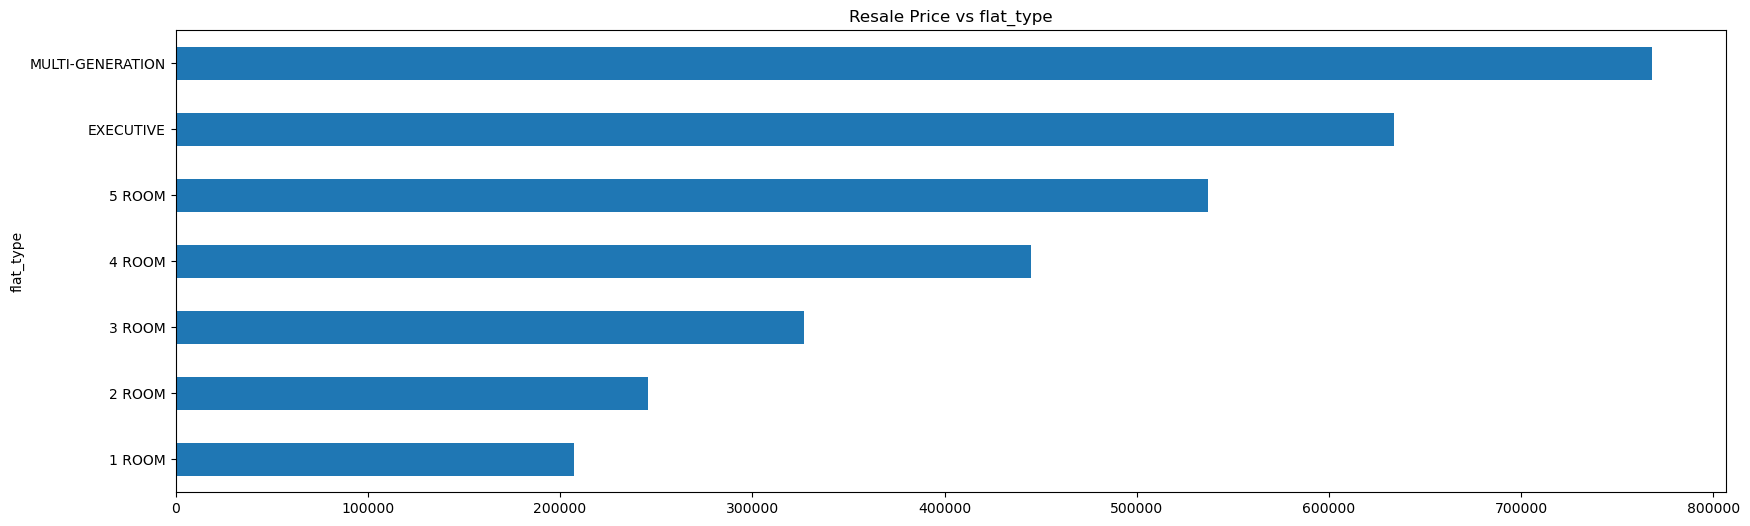

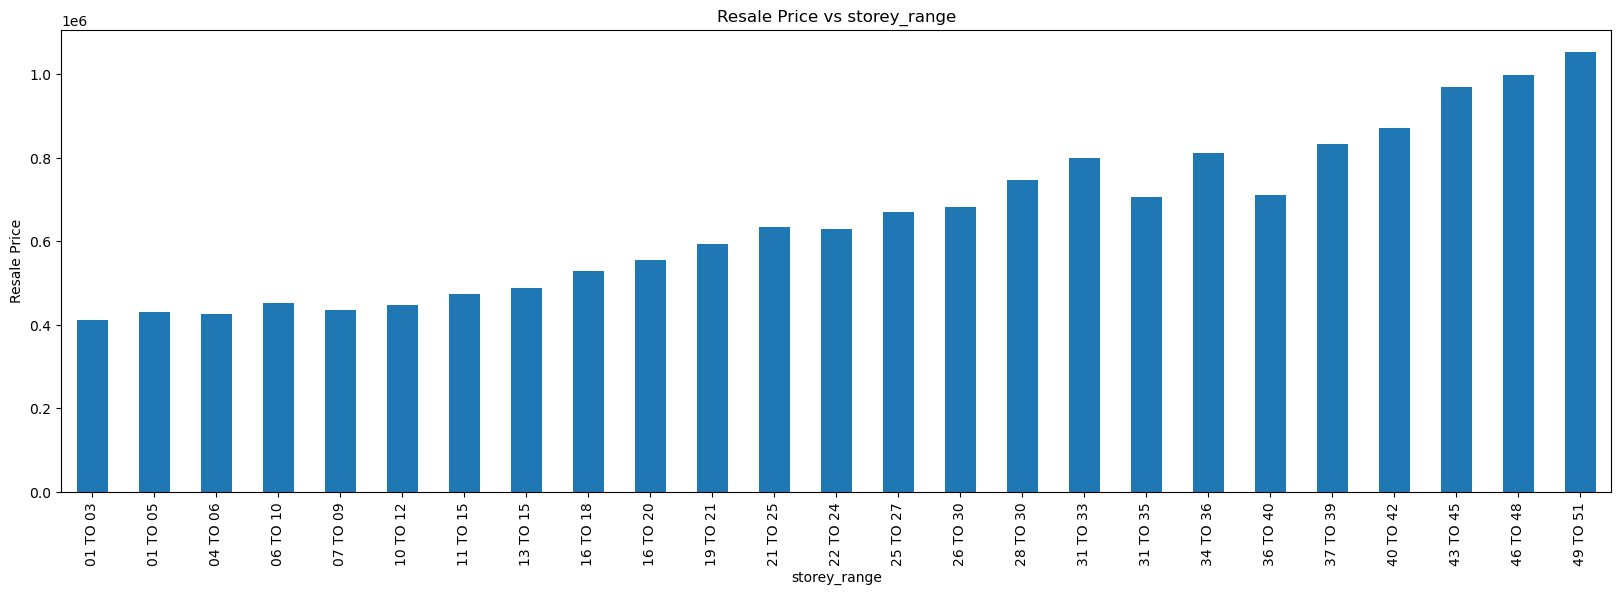

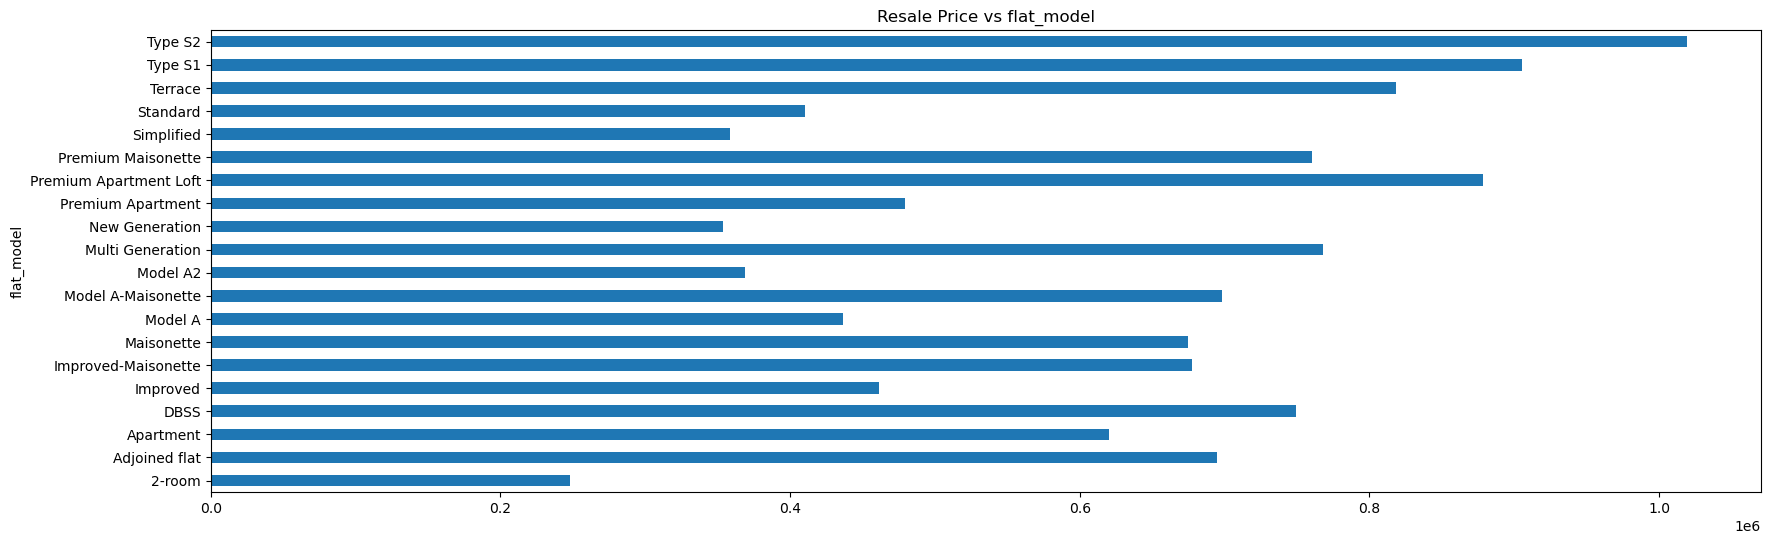

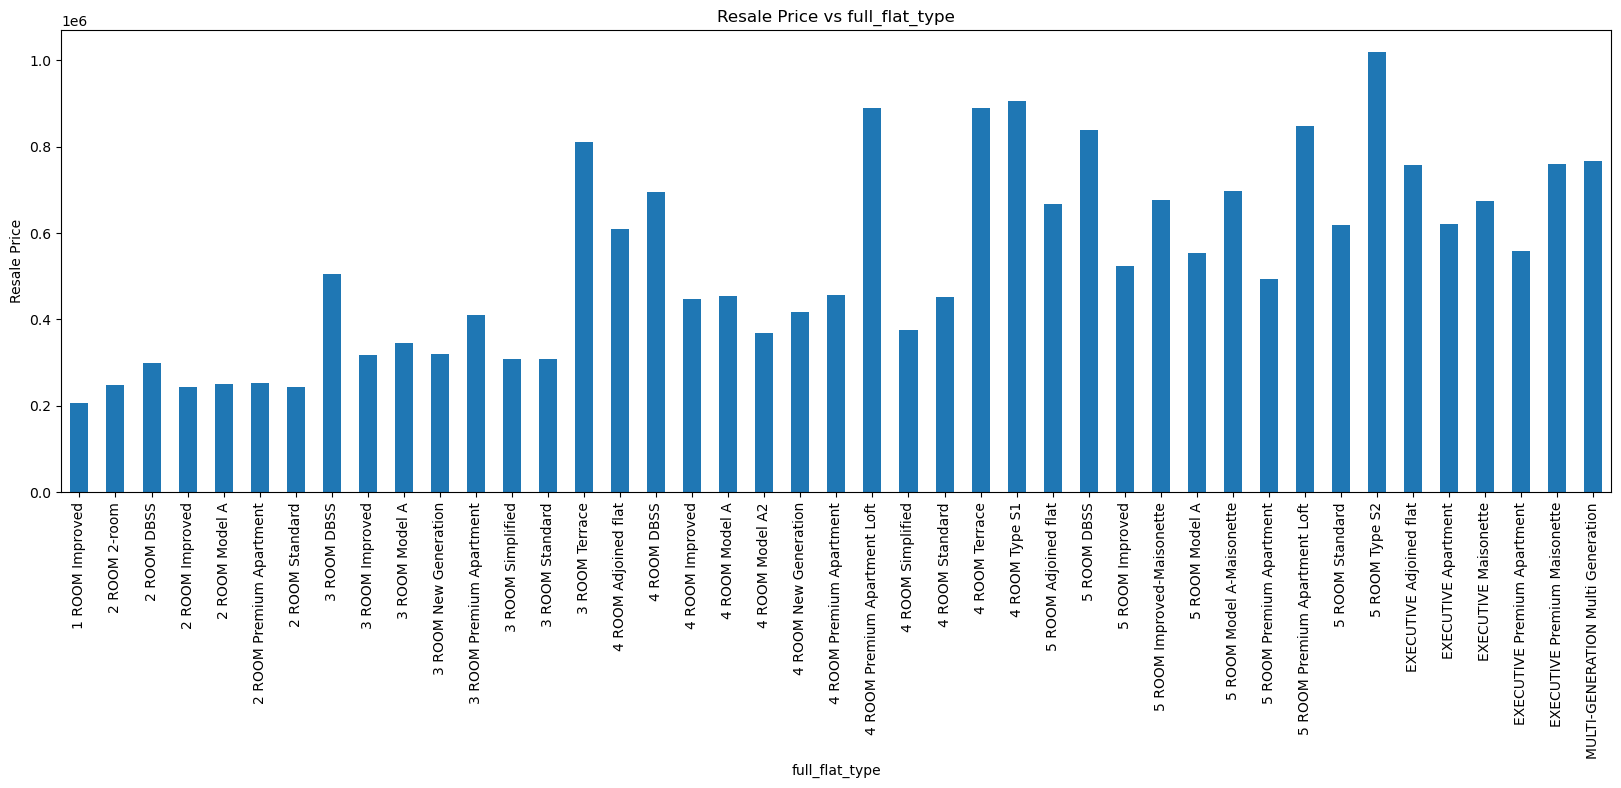

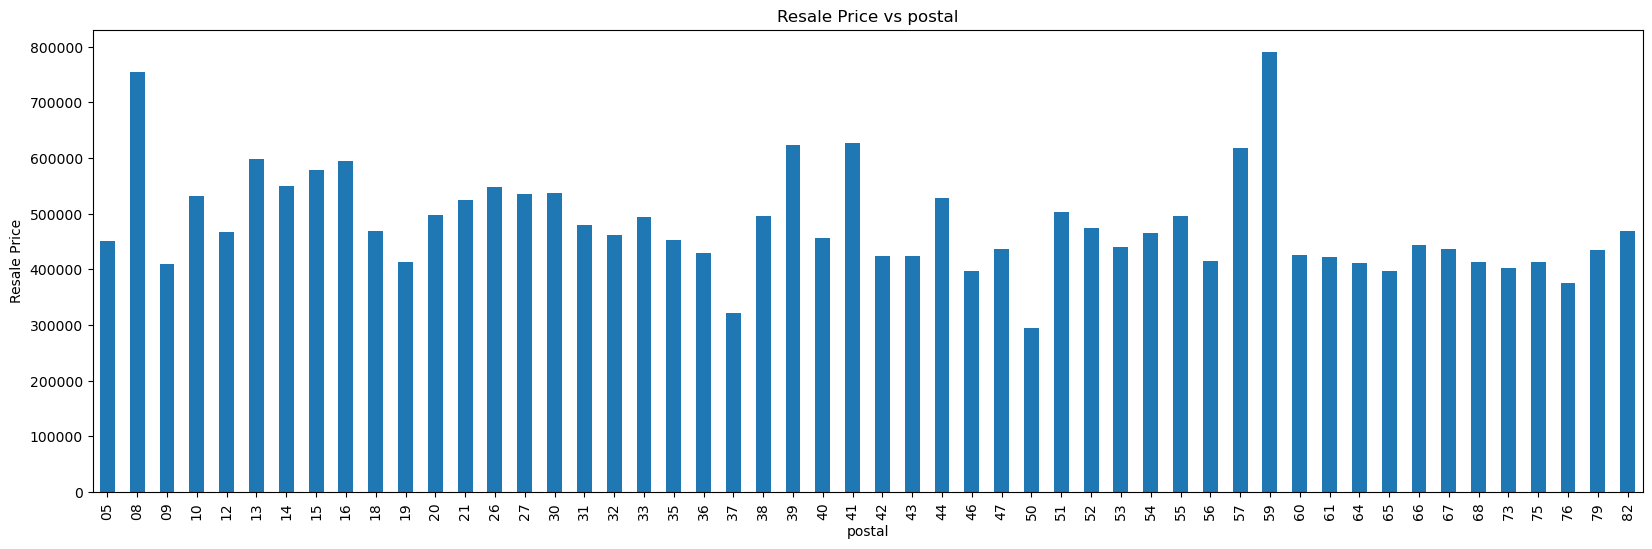

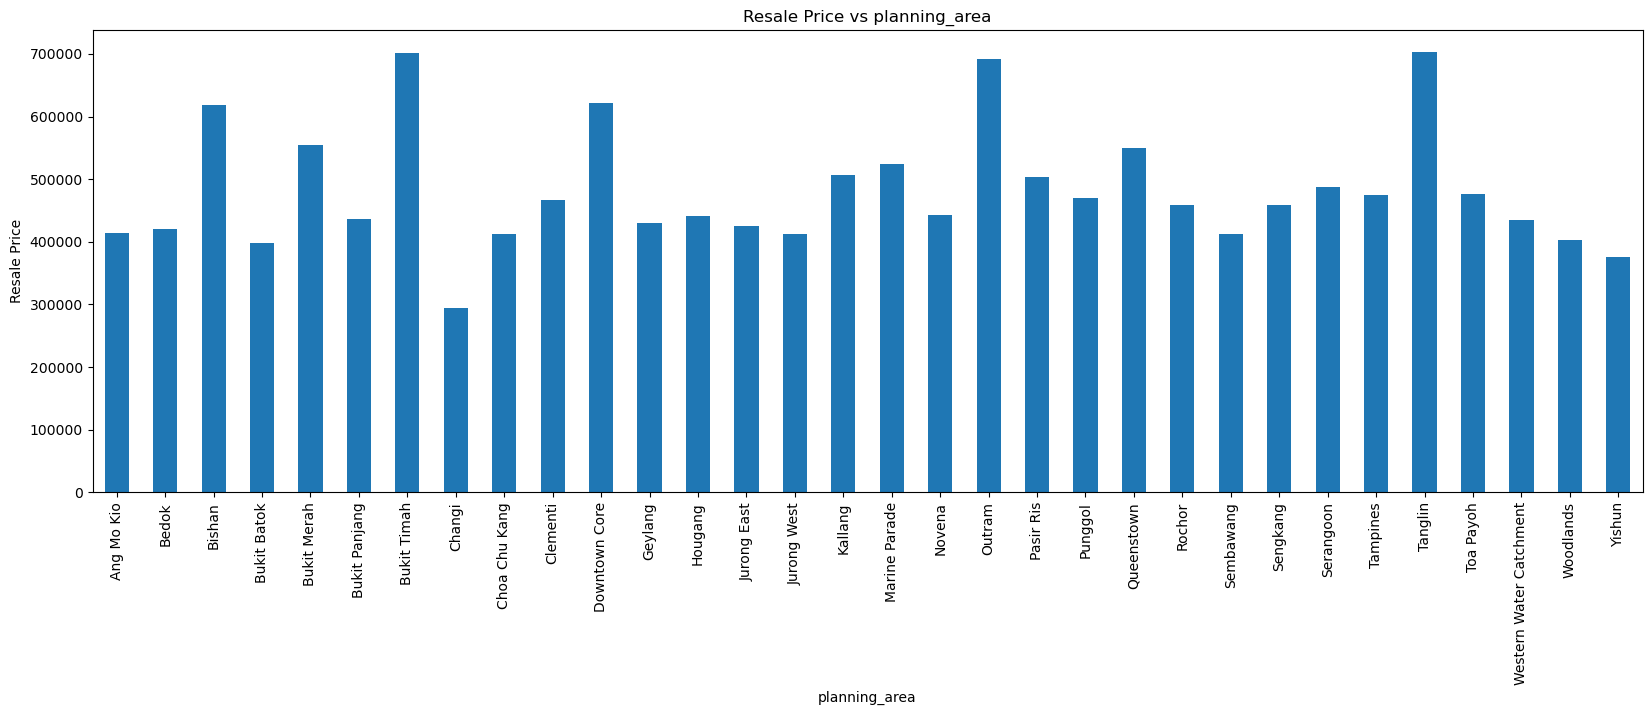

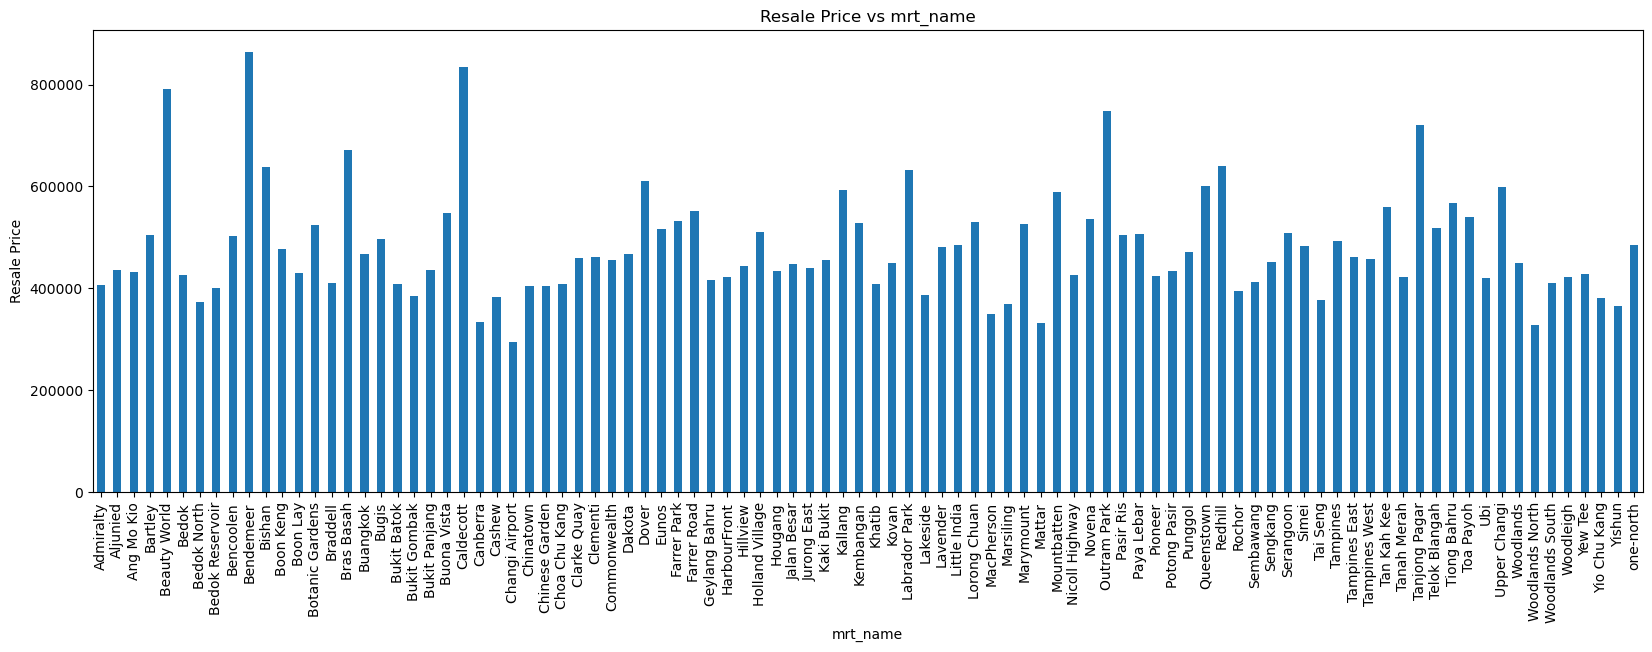

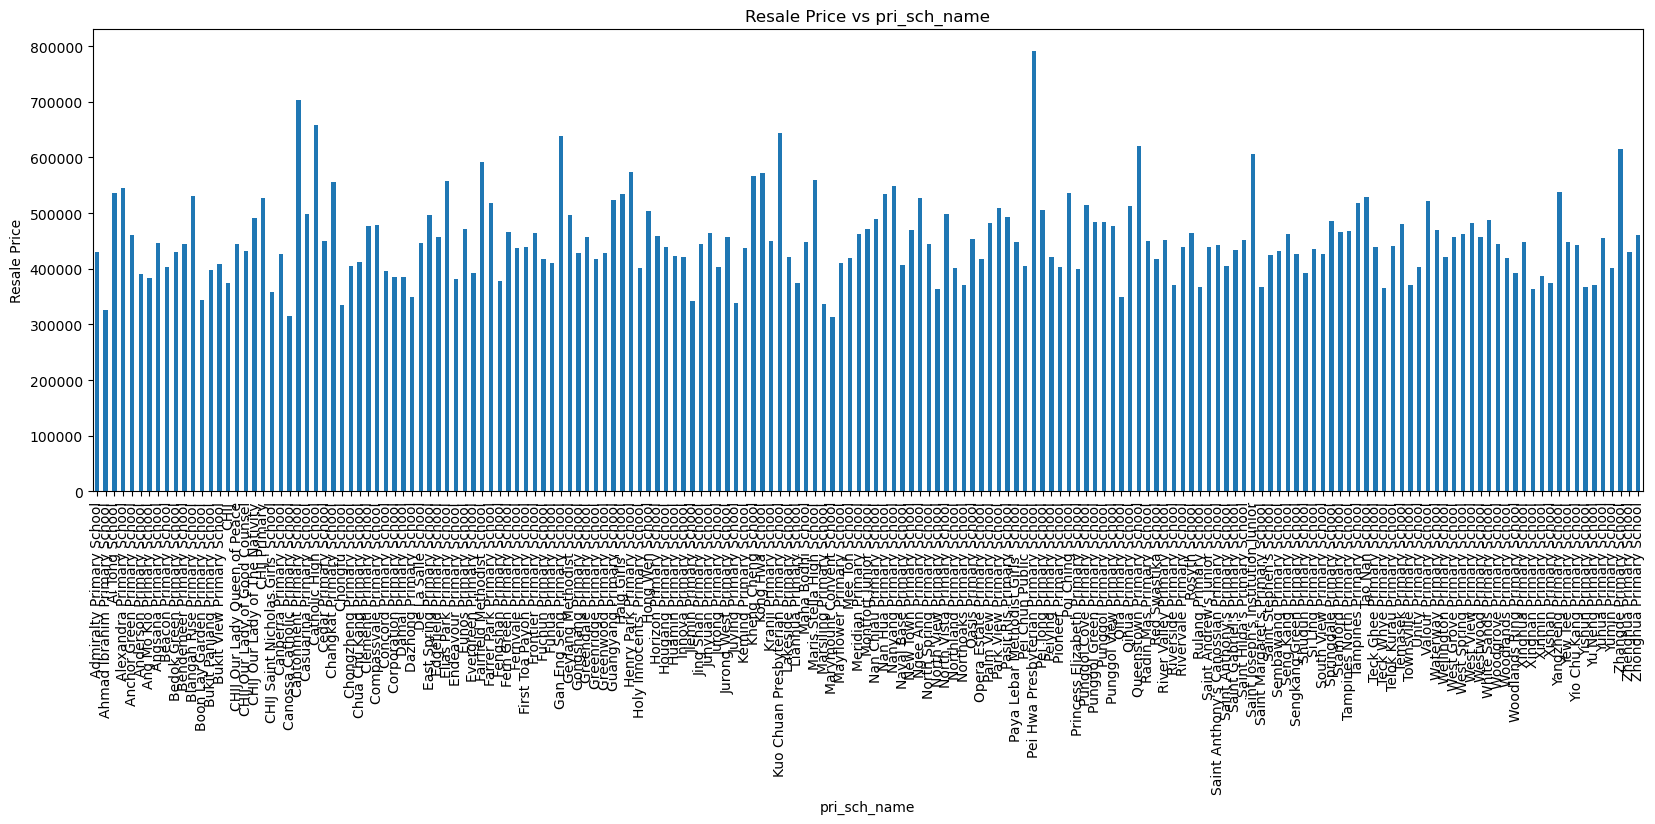

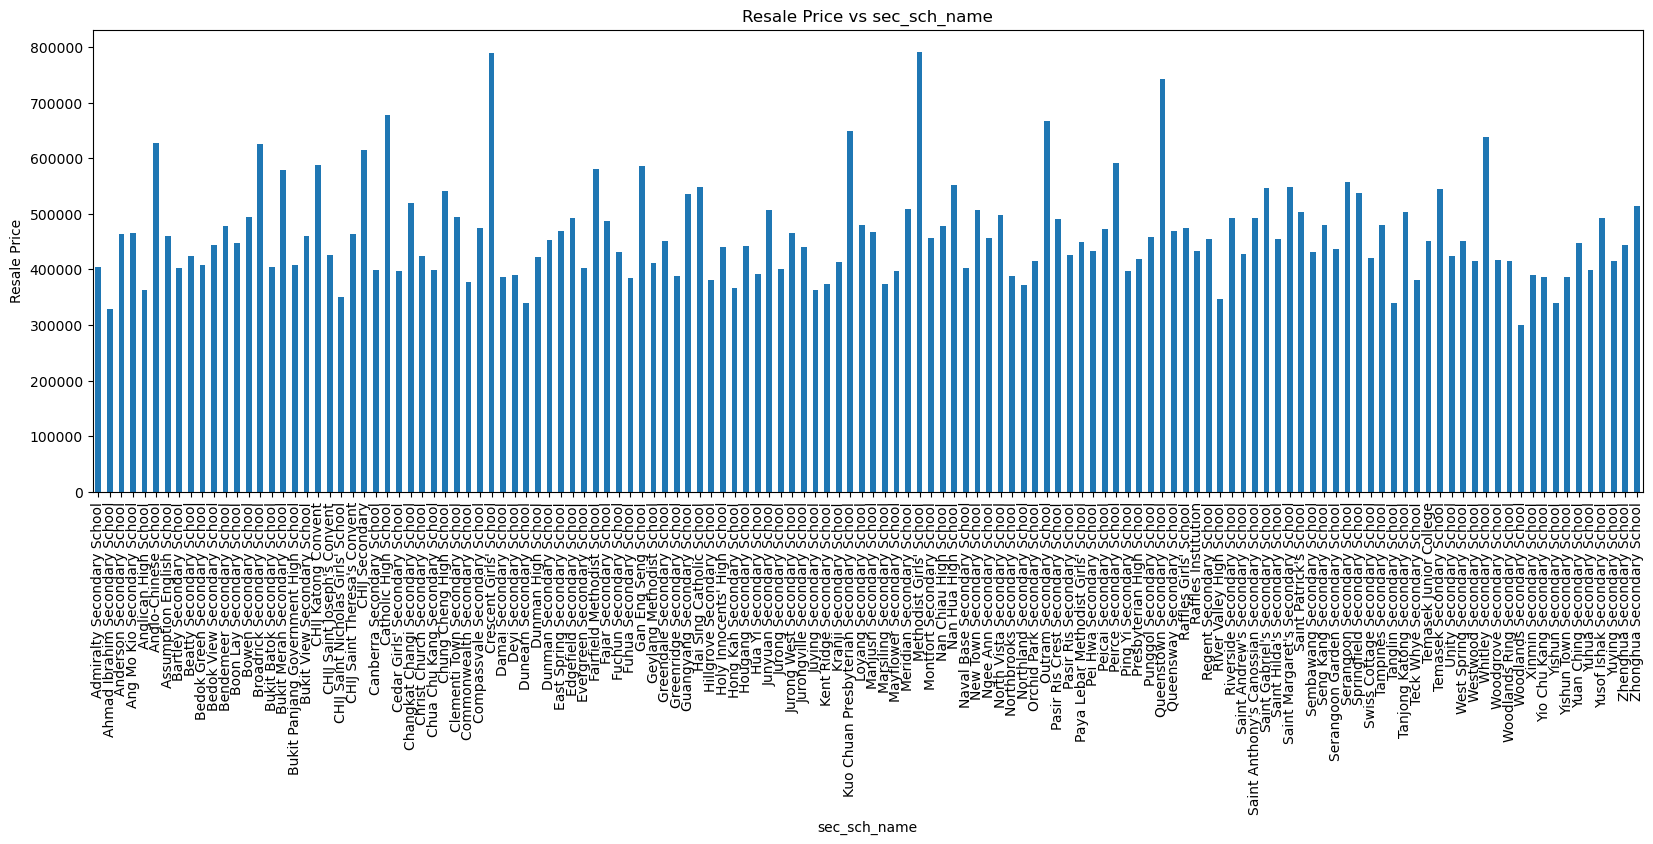

In [42]:
for feature in categorical:
    plt.figure(figsize=(20, 6))
    plt.xlabel(feature)
    plt.ylabel('Resale Price')
    plt.title(f'Resale Price vs {feature}')
    if df[feature].nunique() > 20:
        df.groupby(feature)['resale_price'].mean().plot.bar()
    else:
        df.groupby(feature)['resale_price'].mean().plot.barh()

**Observation**:
* `flat_type` has a strong relationship with HDB price, which is expected, with more bedroom and executive/multigen type being more valuable.
*  `storey_range` also shows trending with higher floor scoring higher price.

# Model Preparation (Feature Engineering)

Recall different features:
* Binary
* Categorical
* Numerical
  
> Categories will be encoded, while numerics will be scaled. Afterwards, three of them will be joined together.

## Train-Test Split

In [43]:
X = df.drop(columns = 'resale_price')
y = df['resale_price']

In [44]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size = 0.4, random_state = 100) # initiate with 60/40 train-test ratio

## Binaries: No Action Needed

In [45]:
X_train_bin = X_train[binary]
X_test_bin = X_test[binary]

## Numerics: Standard Scaler

In [46]:
X_train_num = X_train[numerical]

In [47]:
X_test_num = X_test[numerical]

In [48]:
ss = StandardScaler()

In [49]:
X_train_num_scaled = ss.fit_transform (X_train_num)
X_test_num_scaled = ss.transform (X_test_num)

In [50]:
X_train_num_scaled_df = pd.DataFrame(data = X_train_num_scaled, index = X_train_num.index, columns = X_train_num.columns) # input index to keep original indices
X_train_num_scaled_df

floor_area_sqm  lease_commence_date  tranc_year  tranc_month  \
149650       -0.210885            -1.190153   -1.629195    -0.175590   
4906         -0.251996             0.865312    0.914103    -0.773564   
33832         1.351351             0.865312    0.550774     1.319344   
145643       -0.169773             1.934154    1.640759    -1.371538   
93753        -0.539777            -1.272372    1.277431     1.618331   
...                ...                  ...         ...          ...   
82291         0.529122             1.111968   -0.539210     1.319344   
65631        -1.320895            -1.436809    0.914103    -0.474577   
77676        -0.251996            -0.696842   -1.629195     0.721370   
56100        -1.238672            -1.354591    0.187446    -0.474577   
38414        -1.197561            -1.025716   -1.629195     0.422384   

         hdb_age  max_floor_lvl  year_completed  total_dwelling_units  \
149650  1.190153      -0.503315       -1.140104              0.498714   
4906   -0.865312       1.577352        0.740115              0.327912   
33832  -0.865312       0.296942        0.821863             -0.765225   
145643 -1.934154       0.296942        1.966344              0.293751   
93753   1.272372       0.136890       -1.140104             -0.082015   
...          ...            ...             ...                   ...   
82291  -1.111968       0.296942        1.067109             -0.491941   
65631   1.436809       0.777096       -1.385350              3.248636   
77676   0.696842      -0.823418       -0.567864             -0.594423   
56100   1.354591      -0.183212       -1.221853              1.403968   
38414   1.025716      -1.783726       -0.976607             -0.731065   

        1room_sold  2room_sold  3room_sold  4room_sold  5room_sold  exec_sold  \
149650    -0.02353   -0.151899   -0.570080    2.300480   -0.786248  -0.309048   
4906      -0.02353   -0.151899   -0.570080    1.016377    0.647379  -0.309048   
33832     -0.02353   -0.151899   -0.570080   -1.109035   -0.786248   3.885090   
145643    -0.02353    2.588413    0.125606    0.263627   -0.786248  -0.309048   
93753     -0.02353   -0.151899   -0.570080    1.547730   -0.786248  -0.309048   
...            ...         ...         ...         ...         ...        ...   
82291     -0.02353   -0.151899   -0.570080    0.307906    0.169503  -0.309048   
65631     -0.02353   -0.151899    3.922892   -1.109035   -0.636912  -0.309048   
77676     -0.02353   -0.151899   -0.570080    0.883539   -0.786248  -0.309048   
56100     -0.02353   -0.151899    2.038742   -0.533403   -0.756381  -0.309048   
38414     -0.02353   -0.151899    0.618383   -1.109035   -0.786248  -0.309048   

        multigen_sold  studio_apartment_sold  1room_rental  2room_rental  \
149650      -0.018778               -0.08344      -0.03161     -0.055919   
4906        -0.018778               -0.08344      -0.03161     -0.055919   
33832       -0.018778               -0.08344      -0.03161     -0.055919   
145643      -0.018778               -0.08344      -0.03161     -0.055919   
93753       -0.018778               -0.08344      -0.03161     -0.055919   
...               ...                    ...           ...           ...   
82291       -0.018778               -0.08344      -0.03161     -0.055919   
65631       -0.018778               -0.08344      -0.03161     -0.055919   
77676       -0.018778               -0.08344      -0.03161     -0.055919   
56100       -0.018778               -0.08344      -0.03161     -0.055919   
38414       -0.018778               -0.08344      -0.03161     -0.055919   

        3room_rental  other_room_rental  latitude  longitude  \
149650     -0.088814          -0.015621 -0.840129   1.369368   
4906       -0.088814          -0.015621  0.075150   0.093771   
33832      -0.088814          -0.015621  0.675257   0.936286   
145643     -0.088814          -0.015621  0.914979   0.780060   
93753      -0.088814          -0.015621 -1.053281   1.398094

In [51]:
X_test_num_scaled_df = pd.DataFrame(data = X_test_num_scaled, index = X_test_num.index, columns = X_test[numerical].columns)
X_test_num_scaled_df

floor_area_sqm  lease_commence_date  tranc_year  tranc_month  \
126501        0.282453            -0.696842   -0.902538     0.422384   
60434        -1.279783            -1.519028   -0.902538    -1.371538   
113926       -1.197561            -0.696842   -0.902538     0.123397   
20591        -1.567564            -1.765684    0.187446     0.123397   
8109         -0.210885             0.454219    0.914103     0.422384   
...                ...                  ...         ...          ...   
10276         0.734679             0.618656   -0.539210     1.020357   
149818       -1.197561            -1.025716   -0.175882     0.721370   
69241        -0.046439             1.605279    0.550774     0.123397   
41701         0.981348            -0.614623    1.277431     0.721370   
28907        -0.950892            -0.696842    0.187446     0.123397   

         hdb_age  max_floor_lvl  year_completed  total_dwelling_units  \
126501  0.696842      -0.343264       -0.567864              0.140029   
60434   1.519028       0.136890       -1.467099              1.250246   
113926  0.696842      -0.503315       -0.567864              0.122948   
20591   1.765684      -0.823418       -2.284585             -0.491941   
8109   -0.454219       0.136890        0.494869             -0.696904   
...          ...            ...             ...                   ...   
10276  -0.618656      -0.503315        0.576617             -0.389459   
149818  1.025716      -0.503315       -0.976607              0.823239   
69241  -1.605279       1.577352        1.639350              0.362072   
41701   0.614623      -0.503315       -0.567864             -0.252817   
28907   0.696842      -0.823418       -0.649612             -0.594423   

        1room_sold  2room_sold  3room_sold  4room_sold  5room_sold  exec_sold  \
126501    -0.02353   -0.151899   -0.570080    1.569869   -0.427841  -0.309048   
60434     -0.02353   -0.151899    2.285131   -1.109035   -0.756381  -0.309048   
113926    -0.02353   -0.151899    0.386488    0.352186   -0.786248  -0.309048   
20591     -0.02353    1.389526    0.531422   -1.064756   -0.786248  -0.309048   
8109      -0.02353   -0.151899   -0.570080    0.750700   -0.786248  -0.309048   
...            ...         ...         ...         ...         ...        ...   
10276     -0.02353   -0.151899   -0.570080   -0.090609    0.886316  -0.309048   
149818    -0.02353   -0.151899    1.401030   -0.378425   -0.786248  -0.151768   
69241     -0.02353   -0.151899   -0.570080    2.123362   -0.786248  -0.309048   
41701     -0.02353   -0.151899   -0.570080   -0.754800    2.021271  -0.309048   
28907     -0.02353   -0.151899    0.212566   -0.312006   -0.786248  -0.309048   

        multigen_sold  studio_apartment_sold  1room_rental  2room_rental  \
126501      -0.018778               -0.08344      -0.03161     -0.055919   
60434       -0.018778               -0.08344      -0.03161     -0.055919   
113926      -0.018778               -0.08344      -0.03161     -0.055919   
20591       -0.018778               -0.08344      -0.03161     -0.055919   
8109        -0.018778               -0.08344      -0.03161     -0.055919   
...               ...                    ...           ...           ...   
10276       -0.018778               -0.08344      -0.03161     -0.055919   
149818      -0.018778               -0.08344      -0.03161     -0.055919   
69241       -0.018778               -0.08344      -0.03161     -0.055919   
41701       -0.018778               -0.08344      -0.03161     -0.055919   
28907       -0.018778               -0.08344      -0.03161     -0.055919   

        3room_rental  other_room_rental  latitude  longitude  \
126501     -0.088814          -0.015621 -0.238400   0.705273   
60434      -0.088814          -0.015621 -1.004621   0.228849   
113926     -0.088814          -0.015621  1.527595  -0.109163   
20591      -0.088814          -0.015621 -1.799805  -0.161561   
8109       -0.088814          -0.015621  0.476882  -0.966806

## Categories: One Hot Encoder

In [52]:
X_train_cat = X_train[categorical]

In [53]:
X_test_cat = X_test[categorical]

In [54]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore', sparse_output = False)

In [55]:
# fit and transform
X_train_cat_enc = enc.fit_transform(X_train_cat)
X_test_cat_enc = enc.transform(X_test_cat)

In [56]:
# move into new dataframe
X_train_cat_enc_df = pd.DataFrame(X_train_cat_enc, columns = enc.get_feature_names_out(), index = X_train_cat.index) # input index to keep original indices
X_test_cat_enc_df = pd.DataFrame(X_test_cat_enc, columns = enc.get_feature_names_out(), index = X_test_cat.index)

In [57]:
X_train_cat_enc_df.head()

town_ANG MO KIO  town_BEDOK  town_BISHAN  town_BUKIT BATOK  \
149650              0.0         1.0          0.0               0.0   
4906                1.0         0.0          0.0               0.0   
33832               0.0         0.0          0.0               0.0   
145643              0.0         0.0          0.0               0.0   
93753               0.0         1.0          0.0               0.0   

        town_BUKIT MERAH  town_BUKIT PANJANG  town_BUKIT TIMAH  \
149650               0.0                 0.0               0.0   
4906                 0.0                 0.0               0.0   
33832                0.0                 0.0               0.0   
145643               0.0                 0.0               0.0   
93753                0.0                 0.0               0.0   

        town_CENTRAL AREA  town_CHOA CHU KANG  town_CLEMENTI  town_GEYLANG  \
149650                0.0                 0.0            0.0           0.0   
4906                  0.0                 0.0            0.0           0.0   
33832                 0.0                 0.0            0.0           0.0   
145643                0.0                 0.0            0.0           0.0   
93753                 0.0                 0.0            0.0           0.0   

        town_HOUGANG  town_JURONG EAST  town_JURONG WEST  \
149650           0.0               0.0               0.0   
4906             0.0               0.0               0.0   
33832            0.0               0.0               0.0   
145643           0.0               0.0               0.0   
93753            0.0               0.0               0.0   

        town_KALLANG/WHAMPOA  town_MARINE PARADE  town_PASIR RIS  \
149650                   0.0                 0.0             0.0   
4906                     0.0                 0.0             0.0   
33832                    0.0                 0.0             0.0   
145643                   0.0                 0.0             0.0   
93753                    0.0                 0.0             0.0   

        town_PUNGGOL  town_QUEENSTOWN  town_SEMBAWANG  town_SENGKANG  \
149650           0.0              0.0             0.0            0.0   
4906             0.0              0.0             0.0            0.0   
33832            1.0              0.0             0.0            0.0   
145643           1.0              0.0             0.0            0.0   
93753            0.0              0.0             0.0            0.0   

        town_SERANGOON  town_TAMPINES  town_TOA PAYOH  town_WOODLANDS  \
149650             0.0            0.0             0.0             0.0   
4906               0.0            0.0             0.0             0.0   
33832              0.0            0.0             0.0             0.0   
145643             0.0            0.0             0.0             0.0   
93753              0.0            0.0             0.0             0.0   

        town_YISHUN  flat_type_1 ROOM  flat_type_2 ROOM  flat_type_3 ROOM  \
149650          0.0               0.0               0.0               0.0   
4906            0.0               0.0               0.0               0.0   
33832           0.0               0.0               0.0               0.0   
145643          0.0               0.0               0.0               0.0   
93753           0.0               0.0               0.0               0.0   

        flat_type_4 ROOM  flat_type_5 ROOM  flat_type_EXECUTIVE  \
149650               1.0               0.0                  0.0   
4906                 1.0               0.0                  0.0   
33832                0.0               0.0                  1.0   
145643               1.0               0.0                  0.0   
93753                1.0               0.0                  0.0   

        flat_type_MULTI-GENERATION  storey_range_01 TO 03  \
149650                         0.0                    0.0   
4906                           0.0                    0.0   
33832                         

## Combine all 3 train/test datasets

In [58]:
X_train_prep = X_train_num_scaled_df.join([X_train_bin,X_train_cat_enc_df])
X_test_prep = X_test_num_scaled_df.join([X_test_bin,X_test_cat_enc_df])
# X_train_cat_enc_df
# X_test_cat_enc_df
# X_train_num_scaled_df
# X_test_num_scaled_df
# X_train_bin
# X_test_bin

In [59]:
# Validate
X_train_prep

floor_area_sqm  lease_commence_date  tranc_year  tranc_month  \
149650       -0.210885            -1.190153   -1.629195    -0.175590   
4906         -0.251996             0.865312    0.914103    -0.773564   
33832         1.351351             0.865312    0.550774     1.319344   
145643       -0.169773             1.934154    1.640759    -1.371538   
93753        -0.539777            -1.272372    1.277431     1.618331   
...                ...                  ...         ...          ...   
82291         0.529122             1.111968   -0.539210     1.319344   
65631        -1.320895            -1.436809    0.914103    -0.474577   
77676        -0.251996            -0.696842   -1.629195     0.721370   
56100        -1.238672            -1.354591    0.187446    -0.474577   
38414        -1.197561            -1.025716   -1.629195     0.422384   

         hdb_age  max_floor_lvl  year_completed  total_dwelling_units  \
149650  1.190153      -0.503315       -1.140104              0.498714   
4906   -0.865312       1.577352        0.740115              0.327912   
33832  -0.865312       0.296942        0.821863             -0.765225   
145643 -1.934154       0.296942        1.966344              0.293751   
93753   1.272372       0.136890       -1.140104             -0.082015   
...          ...            ...             ...                   ...   
82291  -1.111968       0.296942        1.067109             -0.491941   
65631   1.436809       0.777096       -1.385350              3.248636   
77676   0.696842      -0.823418       -0.567864             -0.594423   
56100   1.354591      -0.183212       -1.221853              1.403968   
38414   1.025716      -1.783726       -0.976607             -0.731065   

        1room_sold  2room_sold  3room_sold  4room_sold  5room_sold  exec_sold  \
149650    -0.02353   -0.151899   -0.570080    2.300480   -0.786248  -0.309048   
4906      -0.02353   -0.151899   -0.570080    1.016377    0.647379  -0.309048   
33832     -0.02353   -0.151899   -0.570080   -1.109035   -0.786248   3.885090   
145643    -0.02353    2.588413    0.125606    0.263627   -0.786248  -0.309048   
93753     -0.02353   -0.151899   -0.570080    1.547730   -0.786248  -0.309048   
...            ...         ...         ...         ...         ...        ...   
82291     -0.02353   -0.151899   -0.570080    0.307906    0.169503  -0.309048   
65631     -0.02353   -0.151899    3.922892   -1.109035   -0.636912  -0.309048   
77676     -0.02353   -0.151899   -0.570080    0.883539   -0.786248  -0.309048   
56100     -0.02353   -0.151899    2.038742   -0.533403   -0.756381  -0.309048   
38414     -0.02353   -0.151899    0.618383   -1.109035   -0.786248  -0.309048   

        multigen_sold  studio_apartment_sold  1room_rental  2room_rental  \
149650      -0.018778               -0.08344      -0.03161     -0.055919   
4906        -0.018778               -0.08344      -0.03161     -0.055919   
33832       -0.018778               -0.08344      -0.03161     -0.055919   
145643      -0.018778               -0.08344      -0.03161     -0.055919   
93753       -0.018778               -0.08344      -0.03161     -0.055919   
...               ...                    ...           ...           ...   
82291       -0.018778               -0.08344      -0.03161     -0.055919   
65631       -0.018778               -0.08344      -0.03161     -0.055919   
77676       -0.018778               -0.08344      -0.03161     -0.055919   
56100       -0.018778               -0.08344      -0.03161     -0.055919   
38414       -0.018778               -0.08344      -0.03161     -0.055919   

        3room_rental  other_room_rental  latitude  longitude  \
149650     -0.088814          -0.015621 -0.840129   1.369368   
4906       -0.088814          -0.015621  0.075150   0.093771   
33832      -0.088814          -0.015621  0.675257   0.936286   
145643     -0.088814          -0.015621  0.914979   0.780060   
93753      -0.088814          -0.015621 -1.053281   1.398094

In [60]:
X_test_prep

floor_area_sqm  lease_commence_date  tranc_year  tranc_month  \
126501        0.282453            -0.696842   -0.902538     0.422384   
60434        -1.279783            -1.519028   -0.902538    -1.371538   
113926       -1.197561            -0.696842   -0.902538     0.123397   
20591        -1.567564            -1.765684    0.187446     0.123397   
8109         -0.210885             0.454219    0.914103     0.422384   
...                ...                  ...         ...          ...   
10276         0.734679             0.618656   -0.539210     1.020357   
149818       -1.197561            -1.025716   -0.175882     0.721370   
69241        -0.046439             1.605279    0.550774     0.123397   
41701         0.981348            -0.614623    1.277431     0.721370   
28907        -0.950892            -0.696842    0.187446     0.123397   

         hdb_age  max_floor_lvl  year_completed  total_dwelling_units  \
126501  0.696842      -0.343264       -0.567864              0.140029   
60434   1.519028       0.136890       -1.467099              1.250246   
113926  0.696842      -0.503315       -0.567864              0.122948   
20591   1.765684      -0.823418       -2.284585             -0.491941   
8109   -0.454219       0.136890        0.494869             -0.696904   
...          ...            ...             ...                   ...   
10276  -0.618656      -0.503315        0.576617             -0.389459   
149818  1.025716      -0.503315       -0.976607              0.823239   
69241  -1.605279       1.577352        1.639350              0.362072   
41701   0.614623      -0.503315       -0.567864             -0.252817   
28907   0.696842      -0.823418       -0.649612             -0.594423   

        1room_sold  2room_sold  3room_sold  4room_sold  5room_sold  exec_sold  \
126501    -0.02353   -0.151899   -0.570080    1.569869   -0.427841  -0.309048   
60434     -0.02353   -0.151899    2.285131   -1.109035   -0.756381  -0.309048   
113926    -0.02353   -0.151899    0.386488    0.352186   -0.786248  -0.309048   
20591     -0.02353    1.389526    0.531422   -1.064756   -0.786248  -0.309048   
8109      -0.02353   -0.151899   -0.570080    0.750700   -0.786248  -0.309048   
...            ...         ...         ...         ...         ...        ...   
10276     -0.02353   -0.151899   -0.570080   -0.090609    0.886316  -0.309048   
149818    -0.02353   -0.151899    1.401030   -0.378425   -0.786248  -0.151768   
69241     -0.02353   -0.151899   -0.570080    2.123362   -0.786248  -0.309048   
41701     -0.02353   -0.151899   -0.570080   -0.754800    2.021271  -0.309048   
28907     -0.02353   -0.151899    0.212566   -0.312006   -0.786248  -0.309048   

        multigen_sold  studio_apartment_sold  1room_rental  2room_rental  \
126501      -0.018778               -0.08344      -0.03161     -0.055919   
60434       -0.018778               -0.08344      -0.03161     -0.055919   
113926      -0.018778               -0.08344      -0.03161     -0.055919   
20591       -0.018778               -0.08344      -0.03161     -0.055919   
8109        -0.018778               -0.08344      -0.03161     -0.055919   
...               ...                    ...           ...           ...   
10276       -0.018778               -0.08344      -0.03161     -0.055919   
149818      -0.018778               -0.08344      -0.03161     -0.055919   
69241       -0.018778               -0.08344      -0.03161     -0.055919   
41701       -0.018778               -0.08344      -0.03161     -0.055919   
28907       -0.018778               -0.08344      -0.03161     -0.055919   

        3room_rental  other_room_rental  latitude  longitude  \
126501     -0.088814          -0.015621 -0.238400   0.705273   
60434      -0.088814          -0.015621 -1.004621   0.228849   
113926     -0.088814          -0.015621  1.527595  -0.109163   
20591      -0.088814          -0.015621 -1.799805  -0.161561   
8109       -0.088814          -0.015621  0.476882  -0.966806

# Modeling

3 Models are evaluated:
* Linear Regression (baseline model)
* Ridge Regression
* Lasso Regression

In [61]:
# instantiate 3 different models
lr = LinearRegression()
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))
lasso = LassoCV(n_alphas=200, max_iter = 10000)

Cross validate different model scores

In [65]:
lr_scores = cross_val_score(lr, X_train_prep, y_train, cv=5, n_jobs = -1)
print(lr_scores)
print(lr_scores.mean())

[ 9.15809923e-01 -1.27246716e+12  9.14889000e-01  9.13398409e-01
 -2.35396104e+16]
-4708176577150260.0


In [66]:
ridge_scores = cross_val_score(ridge, X_train_prep, y_train, cv=5, n_jobs = -1)
print(ridge_scores)
print(ridge_scores.mean())

[0.91583408 0.91574379 0.9149045  0.91342337 0.91241439]
0.9144640248430234


In [67]:
lasso_scores = cross_val_score(lasso, X_train_prep, y_train, cv=3, n_jobs = -1)
print(lasso_scores)
print(lasso_scores.mean())

[0.90003616 0.89872311 0.89459789]
0.8977857206279848


> Linear and Ridge seem to have similar and joint highest score. We will try to fit these two models in the next section.

## Model 1 : Linear Regression

In [68]:
# fit
lr.fit(X_train_prep, y_train)

LinearRegression()

In [69]:
# train-test score
print(lr.score (X_train_prep, y_train))
print(lr.score (X_test_prep, y_test))

0.9158692351198358
-837772019030275.4


In [70]:
# predict y hat
y_pred_train_lr = lr.predict (X_train_prep)
y_pred_test_lr = lr.predict (X_test_prep)

In [71]:
# MSE
train_lr_mse = metrics.mean_squared_error(y_train,y_pred_train_lr)
test_lr_mse = metrics.mean_squared_error(y_test,y_pred_test_lr)
print(train_lr_mse)
print(test_lr_mse)

1727984267.9718063
1.720976535021234e+25


In [72]:
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_lr)))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_lr)))

41569.03015433252
4148465421118.072


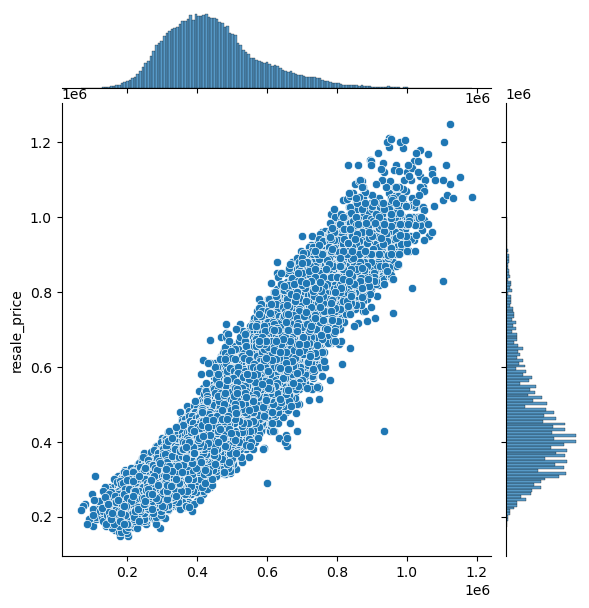

In [73]:
sns.jointplot(x = y_pred_train_lr, y= y_train);

out of memory


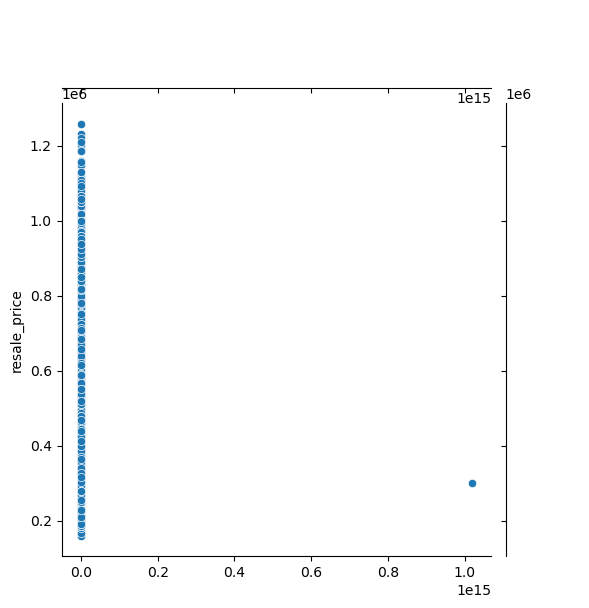

In [74]:
try:
    sns.jointplot(x = y_pred_test_lr, y= y_test);
except:
    print('out of memory')

## Model 2 : Ridge Regression

In [75]:
# fit
ridge.fit(X_train_prep, y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [76]:
ridge.alpha_

0.4

In [77]:
# train-test score
print(ridge.score (X_train_prep, y_train))
print(ridge.score (X_test_prep, y_test))

0.9158638046491353
0.9156530859172191


In [78]:
# predict y hat
y_pred_train_ridge = ridge.predict (X_train_prep)
y_pred_test_ridge = ridge.predict (X_test_prep)

In [79]:
# MSE
train_ridge_mse = metrics.mean_squared_error(y_train,y_pred_train_ridge)
test_ridge_mse = metrics.mean_squared_error(y_test,y_pred_test_ridge)
print(train_ridge_mse)
print(test_ridge_mse)

1728095805.8610842
1732679734.349927


In [80]:
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_ridge)))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_ridge)))

41570.371731090934
41625.469779330146


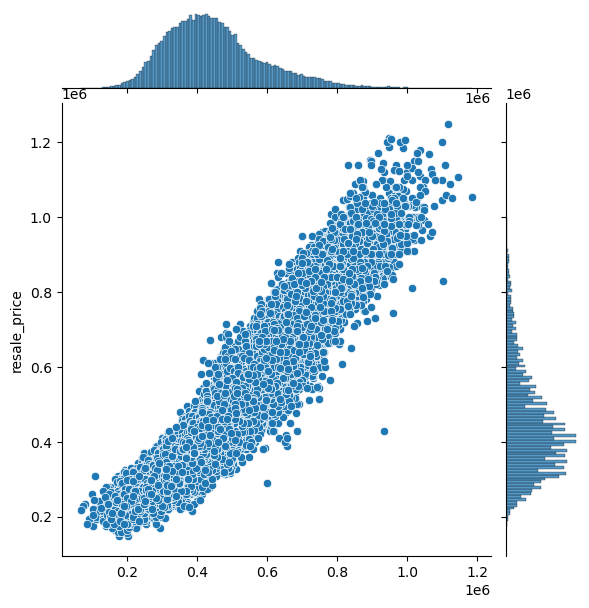

In [81]:
sns.jointplot(x = y_pred_train_ridge, y= y_train);

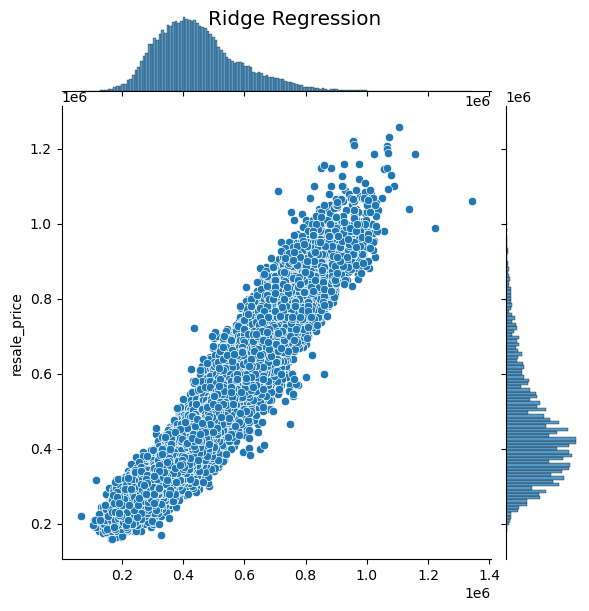

In [82]:
sns.jointplot(x = y_pred_test_ridge, y= y_test).fig.suptitle('Ridge Regression',size = 'x-large');
plt.savefig('../image/ridge_regression_pred')

## Model 3 : Lasso Regression

In [83]:
# fit
lasso.fit(X_train_prep, y_train)

LassoCV(max_iter=10000, n_alphas=200)

In [84]:
lasso.alpha_

93.44620493434059

In [85]:
# train-test score
print(lasso.score (X_train_prep, y_train))
print(lasso.score (X_test_prep, y_test))

0.898354790749866
0.898489410427152


In [86]:
# predict y hat
y_pred_train_lasso = lasso.predict (X_train_prep)
y_pred_test_lasso = lasso.predict (X_test_prep)

In [87]:
# MSE
train_lasso_mse = metrics.mean_squared_error(y_train,y_pred_train_lasso)
test_lasso_mse = metrics.mean_squared_error(y_test,y_pred_test_lasso)
print(train_lasso_mse)
print(test_lasso_mse)

2087718122.4860742
2085261130.0298045


In [88]:
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_lasso)))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_lasso)))

45691.55417017541
45664.659530426856


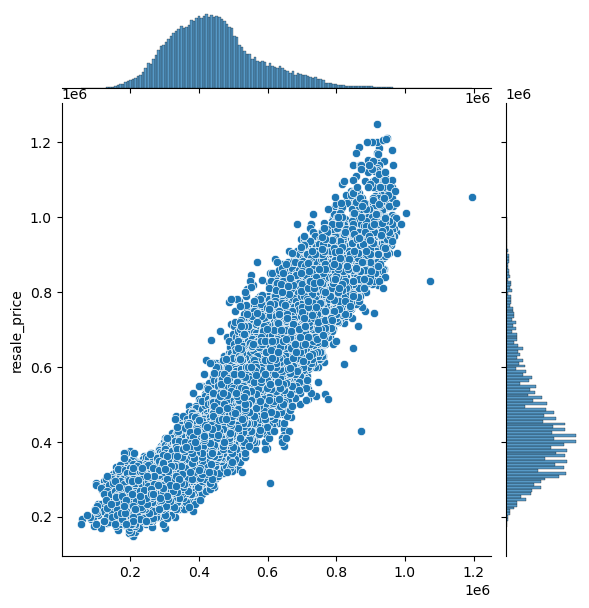

In [89]:
sns.jointplot(x = y_pred_train_lasso, y= y_train);

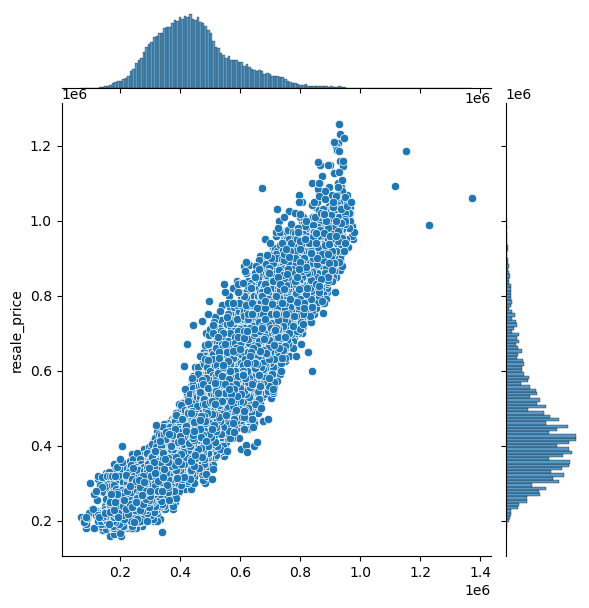

In [90]:
sns.jointplot(x = y_pred_test_lasso, y= y_test);

# Conclusion

Based on 3 models above, **Ridge Regression** score the highest with 0.9156 (R2 value). RMSE is also among the lowest at ~42000, which suggest +/- $42k inaccuracy from expected value.

## Top Contributors

In [91]:
ridge_coef = pd.Series(data= ridge.coef_, index = X_train_prep.columns)
ridge_coef

floor_area_sqm                               73244.651915
lease_commence_date                          13546.173374
tranc_year                                  -14847.449827
tranc_month                                  -2746.930547
hdb_age                                     -13546.173374
                                                 ...     
sec_sch_name_Yuhua Secondary School          -8303.888170
sec_sch_name_Yusof Ishak Secondary School    34366.308653
sec_sch_name_Yuying Secondary School         19378.282296
sec_sch_name_Zhenghua Secondary School       -3475.898940
sec_sch_name_Zhonghua Secondary School       -8687.142476
Length: 661, dtype: float64

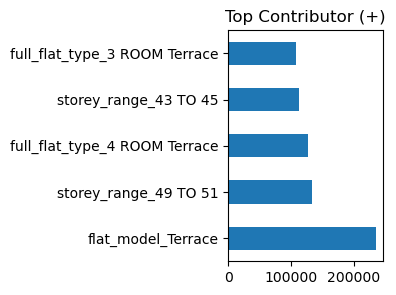

In [92]:
ridge_coef.sort_values(ascending=False)[:5].plot(kind = 'barh',title =  'Top Contributor (+)',figsize =(2,3));

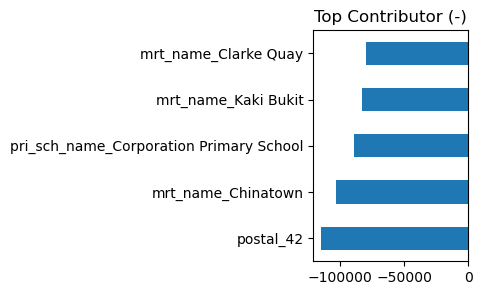

In [93]:
ridge_coef.sort_values(ascending=True)[:5].plot(kind = 'barh',title =  'Top Contributor (-)',figsize =(2,3));

## Future Recommendation

* **Future Improvement**:
    * Consider Time Series Testing
        * As seen in EDA section, data span across period where price fluctuated.
        * Potential time dependency that could skew the conclusion.
        * Train data could be based on past and test on the latest time-frame.
    * Consider More Features
        * Economic Indicators (e.g. interest rate, GDP)
        * Updated Policies (LTV rate, ABSD rate, [MOP](https://www.propertyguru.com.sg/property-guides/mop-sell-hdb-singapore-16413))
        * HDB Condition (renovated block)